In [1]:
import os
import importlib
import numpy              as np # linear algebra
import pandas             as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy              as sp
import matplotlib         as mpl
import matplotlib.pyplot  as plt
from   matplotlib.patches import Rectangle
from   matplotlib         import gridspec, rc
from   matplotlib.colors  import LinearSegmentedColormap
from   matplotlib.font_manager import FontProperties
import seaborn            as sns
import mplhep             as hep
import my_cmaps           #kViridis, parula, jets
import my_files           as mf
import my_vectors         as mv
plt.style.use("default")
plt.style.use(hep.style.ATLAS)
verb = FontProperties()
verb.set_family("monospace")

filepath = 'new_PxAODMaker_output/'
for dirname, _, filenames in os.walk(filepath):
    for filename in filenames:
        print(os.path.join(dirname, filename))

new_PxAODMaker_output/noTau_DF.csv
new_PxAODMaker_output/WpBosonP4.csv
new_PxAODMaker_output/eventLoopHeartBeat.txt
new_PxAODMaker_output/athfile-380200-4cac1b57-7b17-4ff6-becc-d860dc51391a.log.txt
new_PxAODMaker_output/truth_MET.csv
new_PxAODMaker_output/log.txt
new_PxAODMaker_output/reco_MET.csv
new_PxAODMaker_output/pNeutrinoP4.csv
new_PxAODMaker_output/checkxAOD_PAOD2LDF.txt
new_PxAODMaker_output/truthBosonInfo.txt
new_PxAODMaker_output/reco_leading.csv
new_PxAODMaker_output/mLeptonP4.csv
new_PxAODMaker_output/pLeptonP4.csv
new_PxAODMaker_output/WmBosonP4.csv
new_PxAODMaker_output/mNeutrinoP4.csv
new_PxAODMaker_output/Higgs22P4.csv
new_PxAODMaker_output/eventContN.csv
new_PxAODMaker_output/Higgs62P4.csv
new_PxAODMaker_output/reco_sublead.csv
new_PxAODMaker_output/checkxAOD_DAOD.txt
new_PxAODMaker_output/.ipynb_checkpoints/mLeptonP4-checkpoint.csv
new_PxAODMaker_output/.ipynb_checkpoints/reco_sublead-checkpoint.csv
new_PxAODMaker_output/.ipynb_checkpoints/WpBosonP4-checkpoint.csv
ne

In [2]:
GeV = 1/1000
Higgs22 = np.genfromtxt(filepath+'Higgs22P4.csv',delimiter=',')
Higgs22 = Higgs22*GeV
Higgs62 = np.genfromtxt(filepath+'Higgs62P4.csv',delimiter=',')
Higgs62 = Higgs62*GeV
WmBoson = np.genfromtxt(filepath+'WmBosonP4.csv',delimiter=',')
WmBoson = WmBoson*GeV
WpBoson = np.genfromtxt(filepath+'WpBosonP4.csv',delimiter=',')
WpBoson = WpBoson*GeV
mLepton = np.genfromtxt(filepath+'mLeptonP4.csv',delimiter=',')
mLepton = mLepton*GeV
pLepton = np.genfromtxt(filepath+'pLeptonP4.csv',delimiter=',')
pLepton = pLepton*GeV
mNeutrino = np.genfromtxt(filepath+'mNeutrinoP4.csv',delimiter=',')
mNeutrino = mNeutrino*GeV
pNeutrino = np.genfromtxt(filepath+'pNeutrinoP4.csv',delimiter=',')
pNeutrino = pNeutrino*GeV
truthMET = np.genfromtxt(filepath+'truth_MET.csv',delimiter=',')
truthMET[:,1:4] = truthMET[:,1:4]*GeV
noTau_DF = np.genfromtxt(filepath+'noTau_DF.csv',delimiter=',')


In [20]:
mLepton_all = np.genfromtxt(filepath+'mLeptonP4.csv',delimiter=',')
mLepton_all = mLepton_all*GeV
pLepton_all = np.genfromtxt(filepath+'pLeptonP4.csv',delimiter=',')
pLepton_all = pLepton_all*GeV

pLeading_all = np.where(pLepton_all[:,1]**2 + pLepton_all[:,2]**2 > mLepton_all[:,1]**2 + mLepton_all[:,2]**2, 1,0)
mLeading_all = np.where(pLepton_all[:,1]**2 + pLepton_all[:,2]**2 < mLepton_all[:,1]**2 + mLepton_all[:,2]**2, 1,0)
pLeading_all = np.stack([pLeading_all,pLeading_all,pLeading_all,pLeading_all,pLeading_all,pLeading_all,pLeading_all,pLeading_all],axis=-1)
mLeading_all = np.stack([mLeading_all,mLeading_all,mLeading_all,mLeading_all,mLeading_all,mLeading_all,mLeading_all,mLeading_all],axis=-1)

LeadingLep_all =   pLepton_all*pLeading_all +   mLepton_all*mLeading_all
SubleadLep_all =   pLepton_all*mLeading_all +   mLepton_all*pLeading_all

In [3]:
recoLeading = np.genfromtxt(filepath+'reco_leading.csv',delimiter=',')
recoLeading = recoLeading*GeV
recoSublead = np.genfromtxt(filepath+'reco_sublead.csv',delimiter=',')
recoSublead = recoSublead*GeV
recoMET = np.genfromtxt(filepath+'reco_MET.csv',delimiter=',',usecols=(0,1,2,3))
recoMET = recoMET*GeV

In [4]:
with open(filepath+'truthBosonInfo.txt') as file:
    lines = [line.rstrip() for line in file]
print(len(lines))
a = np.array([0,0,0,0,0,0,0,0])
for i in range(1,163904,2):
    if '25,62' not in lines[i] :
        print(lines[i-1])
        print(lines[i])
Higgs62 = np.insert(Higgs62,[43459,58707,62553,68604],a,axis=0)
for i in [43459,58707,62553,68604]:
    noTau_DF[i] = False

163904
# 43460
(25,22,0)	(24,22,2)	(-24,22,2)
# 58708
(25,22,0)	(24,22,3)	(-24,22,2)
# 62554
(25,22,0)	(24,22,2)	(-24,22,2)
# 68605
(25,22,0)	(24,22,2)	(-24,22,2)


In [5]:
with open(filepath+'reco_MET.csv') as file:
    lines = [line.rstrip() for line in file]
print(len(lines))
reco_events = np.zeros(len(lines))
for i in range(len(lines)):
    if '0,0,0,0' in lines[i]:
        reco_events[i] = 0
    else:
        reco_events[i] = 1
print(np.unique(reco_events,return_counts=True))
noTau_DF_reco = np.where(noTau_DF[:,0]*noTau_DF[:,1]*reco_events == 1, True,False)
noTau_DF = np.where(noTau_DF[:,0]*noTau_DF[:,1] == 1, True,False)
Higgs22 = Higgs22[noTau_DF_reco,:]
Higgs62 = Higgs62[noTau_DF_reco,:]
WmBoson = WmBoson[noTau_DF_reco,:]
WpBoson = WpBoson[noTau_DF_reco,:]
mLepton = mLepton[noTau_DF_reco,:]      
pLepton = pLepton[noTau_DF_reco,:]
mNeutrino = mNeutrino[noTau_DF_reco,:]
pNeutrino = pNeutrino[noTau_DF_reco,:]  
truthMET  = truthMET[noTau_DF_reco,:]  
recoLeading = recoLeading[noTau_DF_reco,:]
recoSublead = recoSublead[noTau_DF_reco,:]
recoMET = recoMET[noTau_DF_reco,:]

81952
(array([0., 1.]), array([71680, 10272]))


In [29]:
noTau_DF = np.genfromtxt(filepath+'noTau_DF.csv',delimiter=',')
print(np.unique(noTau_DF[:,1],return_counts=True))
print(np.unique(noTau_DF[:,1]*reco_events,return_counts=True))

(array([0., 1.]), array([34198, 47754]))
(array([0., 1.]), array([71761, 10191]))


In [6]:
diNeutrino = pNeutrino[:,0:8]   + mNeutrino[:,0:8]
diLepton   =   pLepton[:,0:8]   +   mLepton[:,0:8]
diBoson    =   WpBoson[:,0:5]   +   WmBoson[:,0:5]
diBoson_mass = mv.inv_mass(diBoson[:,0],diBoson[:,1],diBoson[:,2],diBoson[:,3])
diNeutrino_mass = mv.inv_mass(diNeutrino[:,0],diNeutrino[:,1],diNeutrino[:,2],diNeutrino[:,3])
pLeading = np.where(pLepton[:,1]**2 + pLepton[:,2]**2 > mLepton[:,1]**2 + mLepton[:,2]**2, 1,0)
mLeading = np.where(pLepton[:,1]**2 + pLepton[:,2]**2 < mLepton[:,1]**2 + mLepton[:,2]**2, 1,0)
pLeading = np.stack([pLeading,pLeading,pLeading,pLeading,pLeading,pLeading,pLeading,pLeading],axis=-1)
mLeading = np.stack([mLeading,mLeading,mLeading,mLeading,mLeading,mLeading,mLeading,mLeading],axis=-1)

LeadingLep =   pLepton*pLeading +   mLepton*mLeading
SubleadLep =   pLepton*mLeading +   mLepton*pLeading
LeadingNu  = pNeutrino*pLeading + mNeutrino*mLeading
SubleadNu  = pNeutrino*mLeading + mNeutrino*pLeading
LeadingW   =   WpBoson[:,0:5]*pLeading[:,0:5] +   WmBoson*mLeading[:,0:5]
SubleadW   =   WpBoson[:,0:5]*mLeading[:,0:5] +   WmBoson*pLeading[:,0:5]

In [7]:

LeadingLep[:,-2::] = LeadingLep[:,-2::]*1000
SubleadLep[:,-2::] = SubleadLep[:,-2::]*1000
recoLeading[:,-2::] = recoLeading[:,-2::]*1000
recoSublead[:,-2::] = recoSublead[:,-2::]*1000

In [26]:
len(recoLeading[:,0])

8965

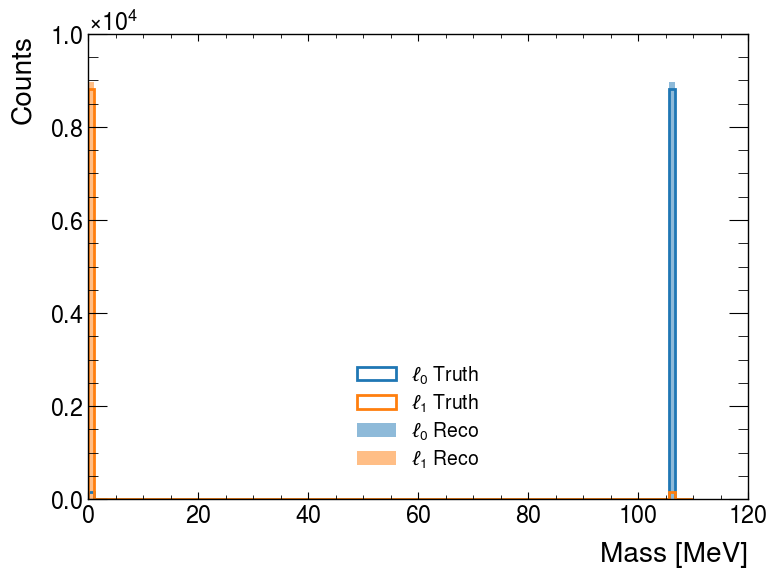

In [18]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6),tight_layout=True)
MeV = 1000
ax.hist(LeadingLep[:,4]*MeV,range=[0,110],histtype='step',bins=100,lw=2,color='C0',label=r'$\ell_0$ Truth')
ax.hist(SubleadLep[:,4]*MeV,range=[0,110],histtype='step',bins=100,lw=2,color='C1',label=r'$\ell_1$ Truth')
ax.hist(recoLeading[:,4]*MeV,range=[0,110],histtype='bar',bins=100,alpha = 0.5,color='C0',label=r'$\ell_0$ Reco')
ax.hist(recoSublead[:,4]*MeV,range=[0,110],histtype='bar',bins=100,alpha = 0.5,color='C1',label=r'$\ell_1$ Reco')
ax.set_xlabel("Mass [MeV]")
ax.set_ylabel("Counts")
ax.legend(loc = 8)
plt.show()

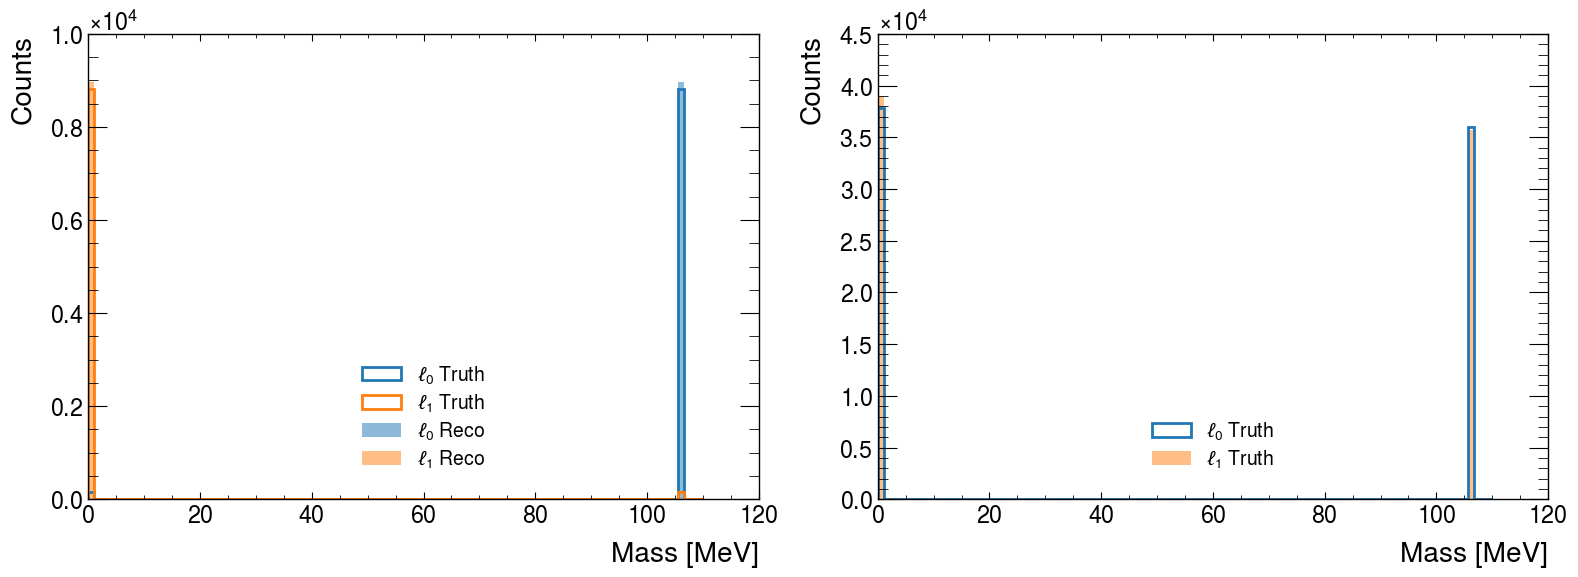

In [25]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,6),tight_layout=True)
MeV = 1000
ax = ax.flatten()
ax[0].hist(LeadingLep[:,4]*MeV,range=[0,110],histtype='step',bins=100,lw=2,color='C0',label=r'$\ell_0$ Truth')
ax[0].hist(SubleadLep[:,4]*MeV,range=[0,110],histtype='step',bins=100,lw=2,color='C1',label=r'$\ell_1$ Truth')
ax[0].hist(recoLeading[:,4]*MeV,range=[0,110],histtype='bar',bins=100,alpha = 0.5,color='C0',label=r'$\ell_0$ Reco')
ax[0].hist(recoSublead[:,4]*MeV,range=[0,110],histtype='bar',bins=100,alpha = 0.5,color='C1',label=r'$\ell_1$ Reco')
ax[0].set_xlabel("Mass [MeV]")
ax[0].set_ylabel("Counts")
ax[0].legend(loc = 8)
ax[1].hist(LeadingLep_all[:,4]*MeV,range=[0,110],histtype='step',bins=100,lw=2,color='C0',label=r'$\ell_0$ Truth')
ax[1].hist(SubleadLep_all[:,4]*MeV,range=[0,110],histtype='bar',bins=100,alpha=0.5,color='C1',label=r'$\ell_1$ Truth')
ax[1].set_xlabel("Mass [MeV]")
ax[1].set_ylabel("Counts")
ax[1].legend(loc = 8)
plt.show()

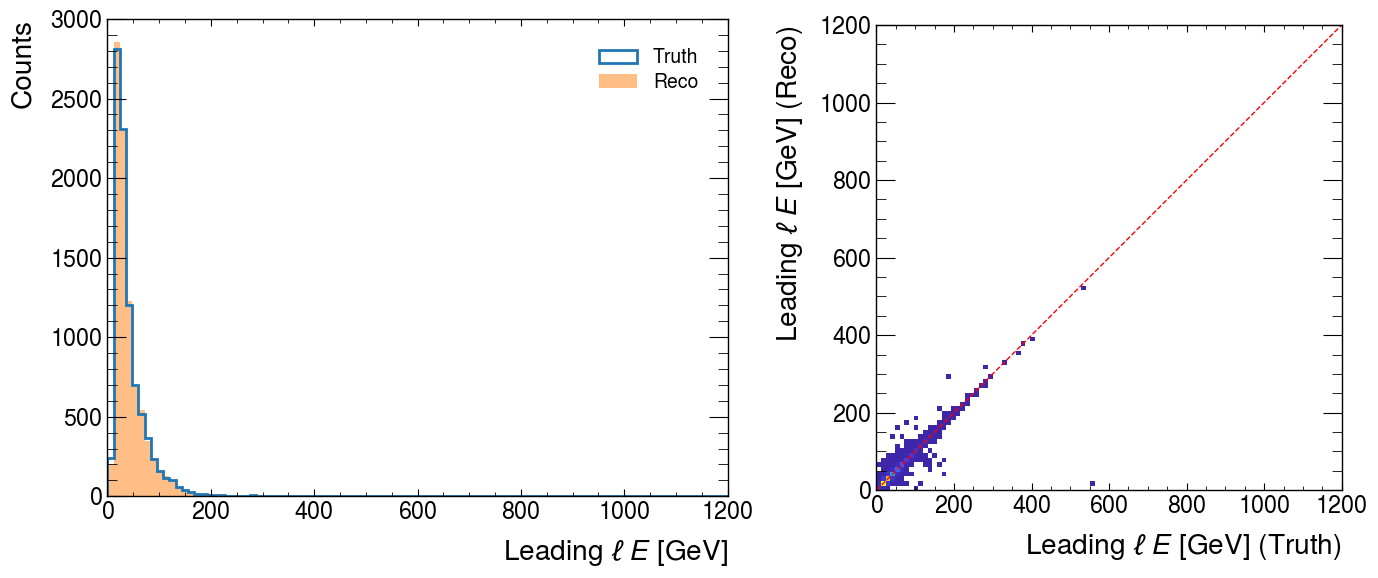

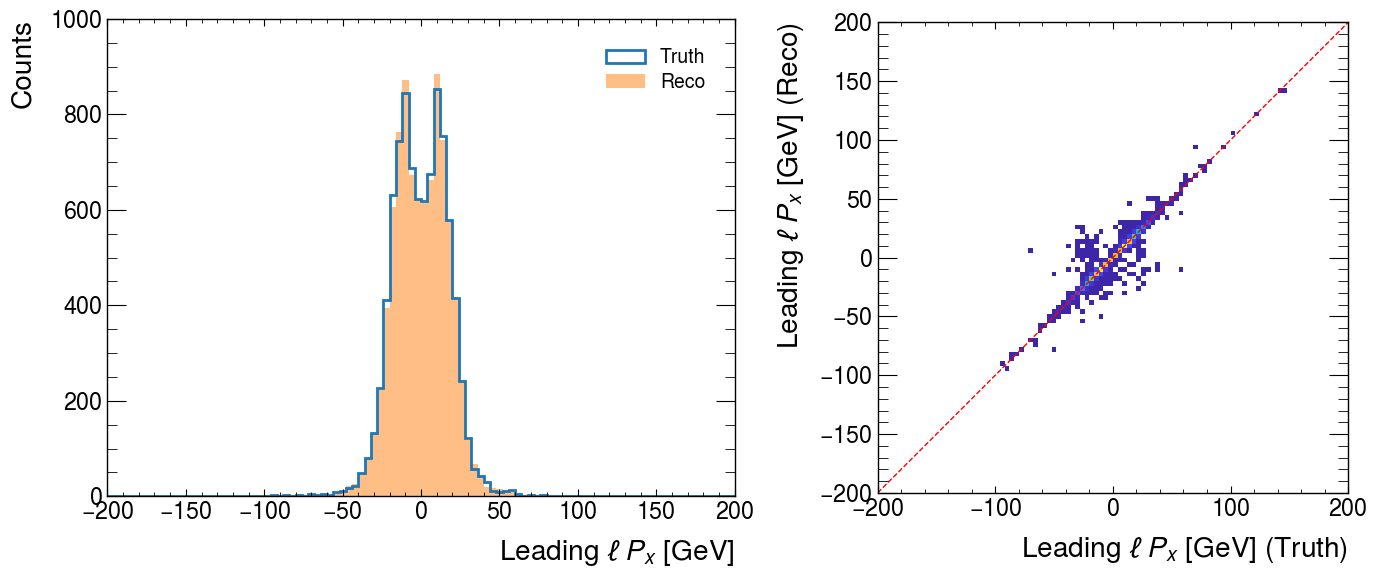

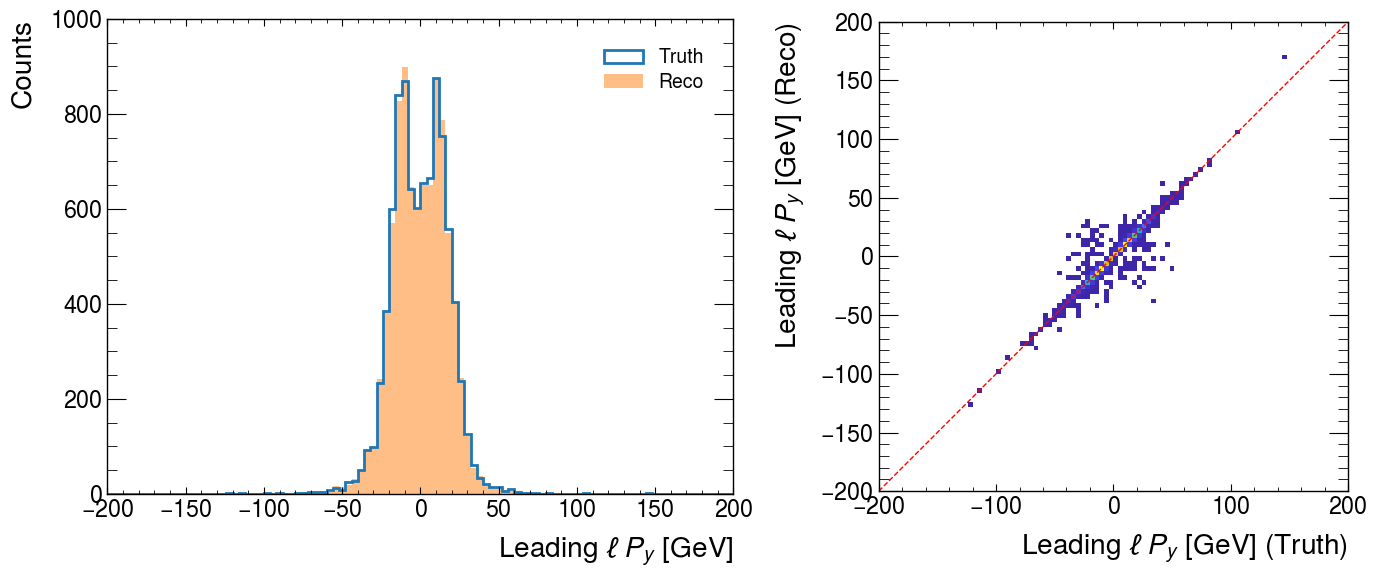

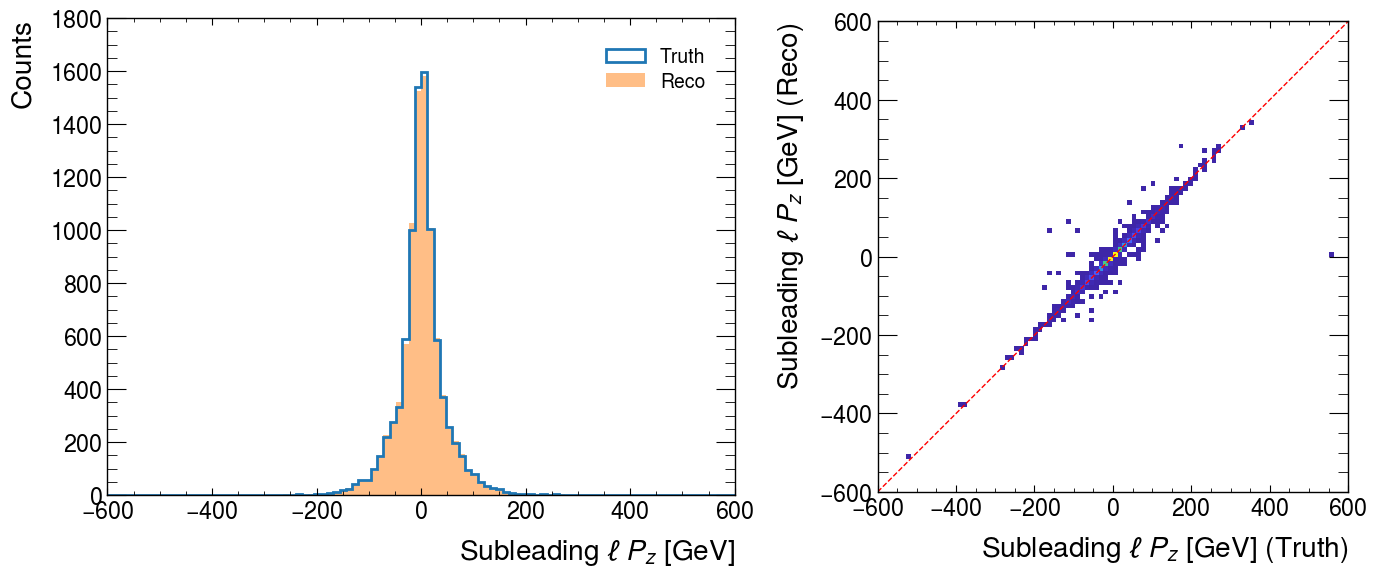

In [25]:
plt_range = [
    [0,1200],
    [-200,200],
    [-200,200],
    [-600,600],
    [0,200]
]
plt_bins=100
xlabel = [
    r'Leading $\ell$ $E$ [GeV]',
    r'Leading $\ell$ $P_x$ [GeV]',
    r'Leading $\ell$ $P_y$ [GeV]',
    r'Subleading $\ell$ $P_z$ [GeV]',
]
plt_names = [
    'reco_lepton_E',
    'reco_lepton_Px',
    'reco_lepton_Py',
    'reco_sllepton_Pz',
]
for i in range(4):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
    ax[0].hist(SubleadLep[:,i],range=plt_range[i],bins=plt_bins,histtype='step',lw=2,label='Truth')
    ax[0].hist(recoSublead[:,i],range=plt_range[i],bins=plt_bins,histtype='bar',alpha=0.5,label='Reco')
    ax[1].hist2d(SubleadLep[:,i],recoSublead[:,i],range=[plt_range[i],plt_range[i]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
    ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1)
    ax[1].set_box_aspect(1)
    ax[0].set_ylabel("Counts")   
    ax[0].set_xlabel(xlabel[i])
    ax[1].set_ylabel(xlabel[i]+' (Reco)')
    ax[1].set_xlabel(xlabel[i]+' (Truth)')
    ax[0].legend()
    if i == 3:
        plt.savefig(filepath+"plots/"+plt_names[i]+'.pdf')
    plt.show()
    

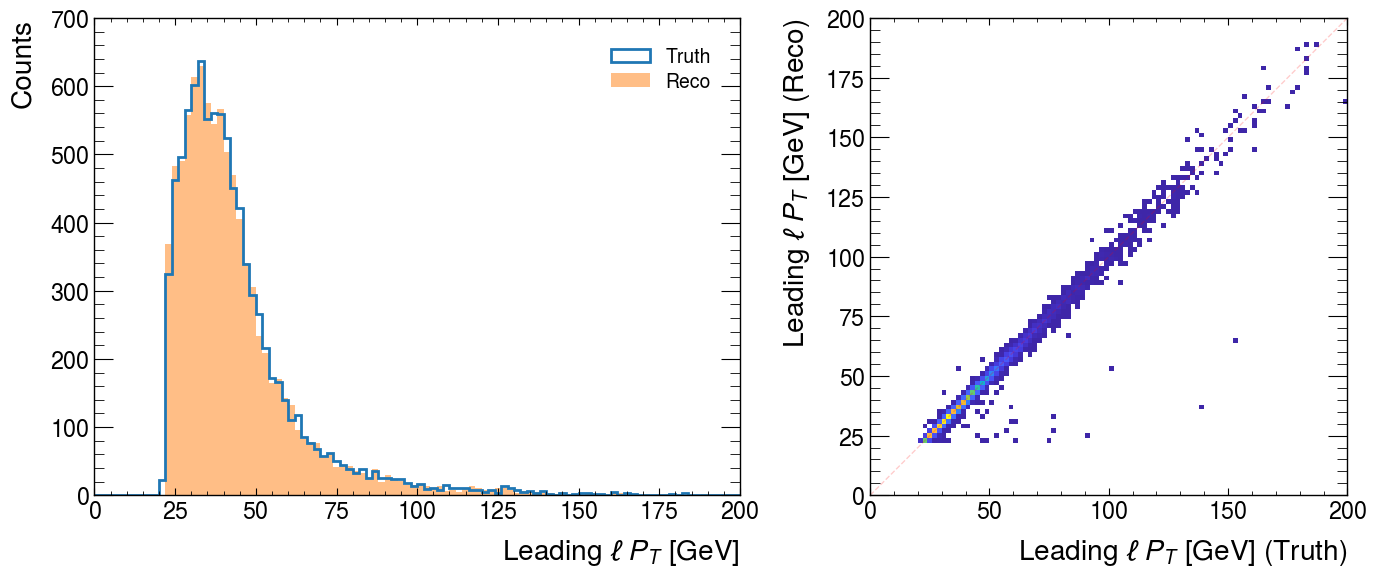

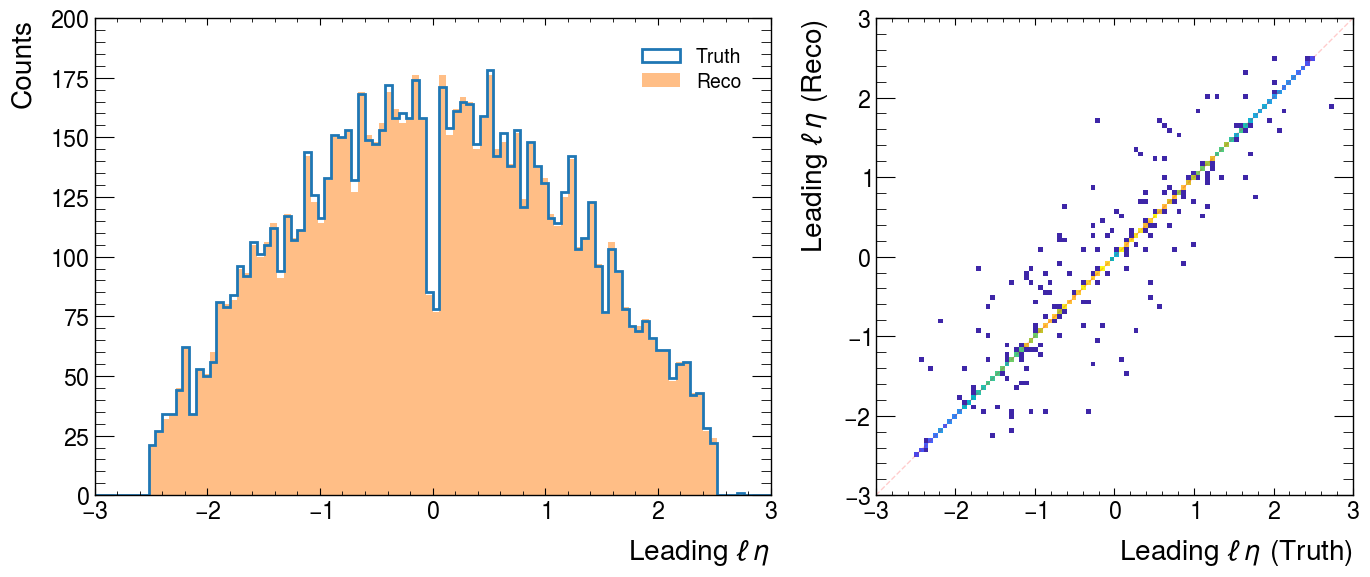

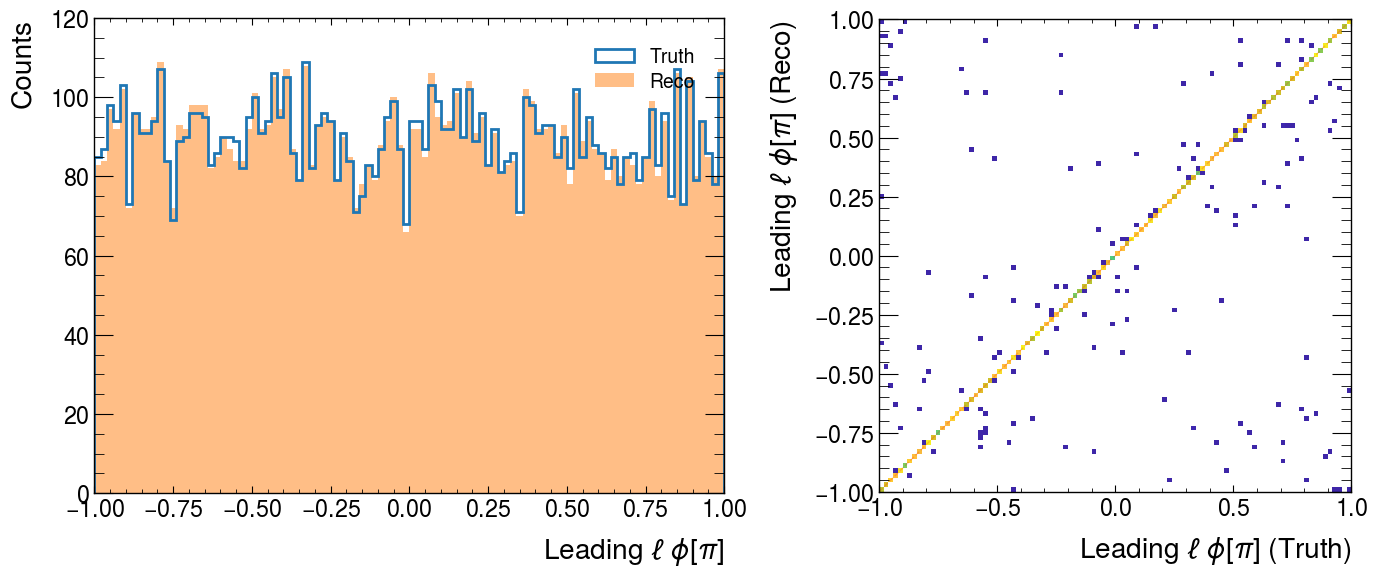

In [76]:
plt_range = [
    [0,200],
    [-3,3],
    [-1,1],
]
plt_bins=100
xlabel = [
    r'Leading $\ell$ $P_T$ [GeV]',
    r'Leading $\ell$ $\eta$',
    r'Leading $\ell$ $\phi$[$\pi$]',
]
plt_names = [
    'reco_lepton_pt',
    'reco_lepton_eta',
    'reco_lepton_phi',
]
f = [1,1,1/np.pi]
for i in range(3):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
    ax[0].hist(LeadingLep[:,i+5]*f[i],range=plt_range[i],bins=plt_bins,histtype='step',lw=2,label='Truth')
    ax[0].hist(recoLeading[:,i+5]*f[i],range=plt_range[i],bins=plt_bins,histtype='bar',alpha=0.5,label='Reco')
    ax[1].hist2d(LeadingLep[:,i+5]*f[i],recoLeading[:,i+5]*f[i],range=[plt_range[i],plt_range[i]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
    ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1,alpha=0.2)
    ax[1].set_box_aspect(1)
    ax[0].set_ylabel("Counts")   
    ax[0].set_xlabel(xlabel[i])
    ax[1].set_ylabel(xlabel[i]+' (Reco)')
    ax[1].set_xlabel(xlabel[i]+' (Truth)')
    ax[0].legend()
    plt.savefig(filepath+"plots/"+plt_names[i]+'.pdf')
    plt.show()
    

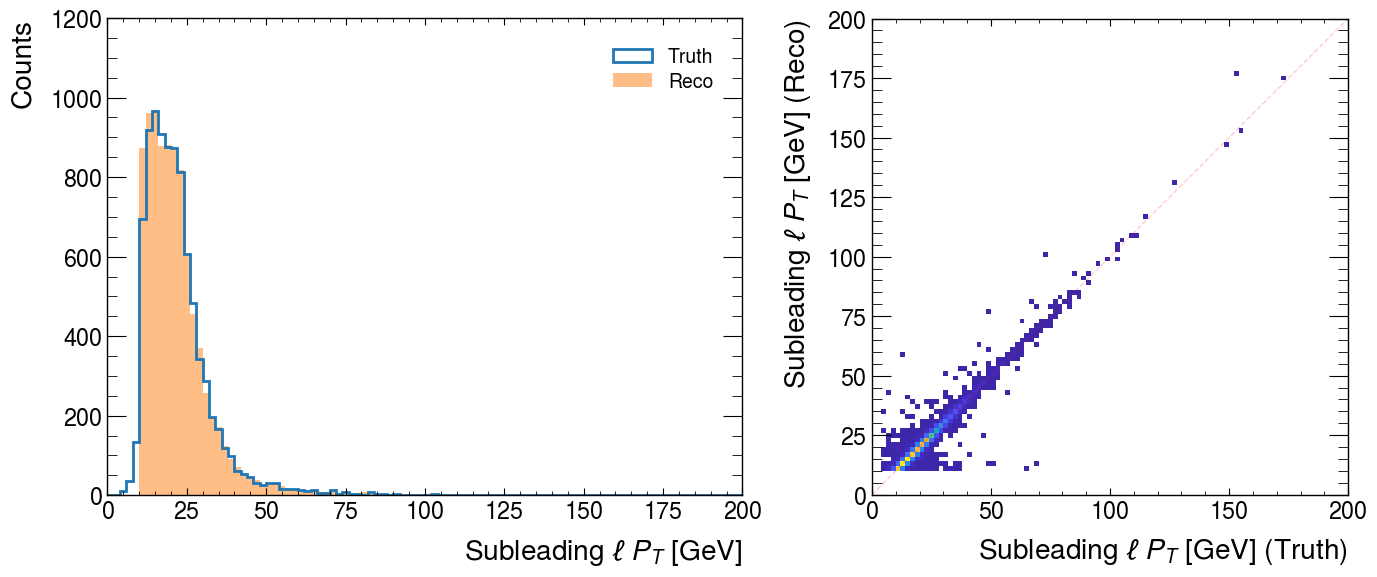

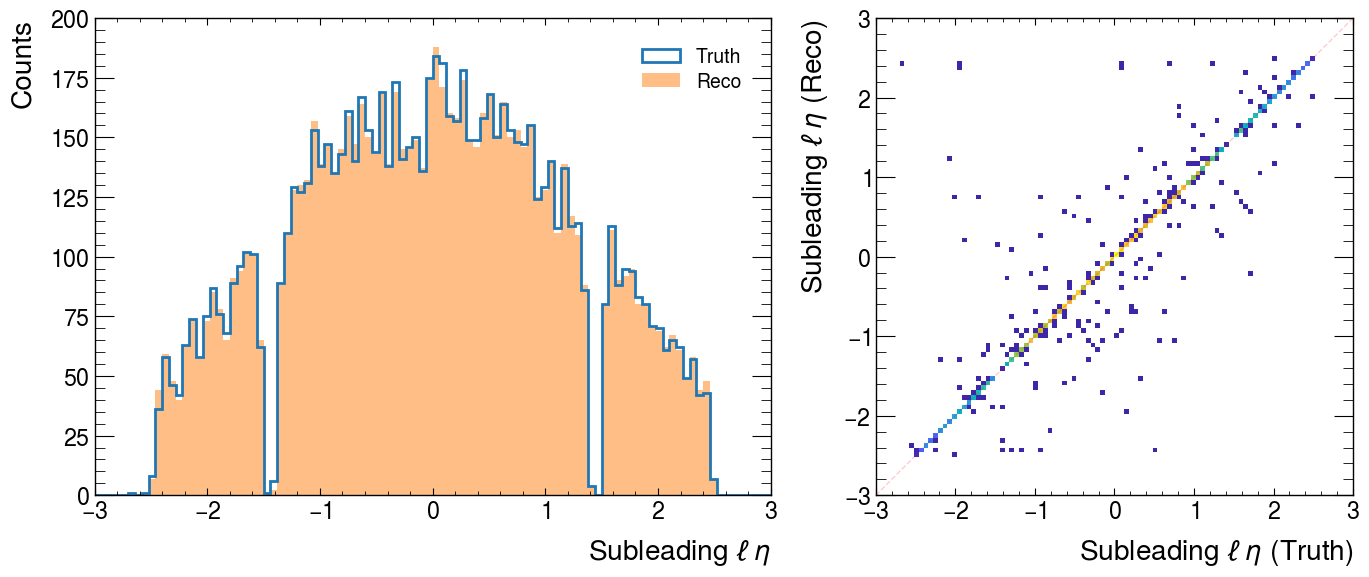

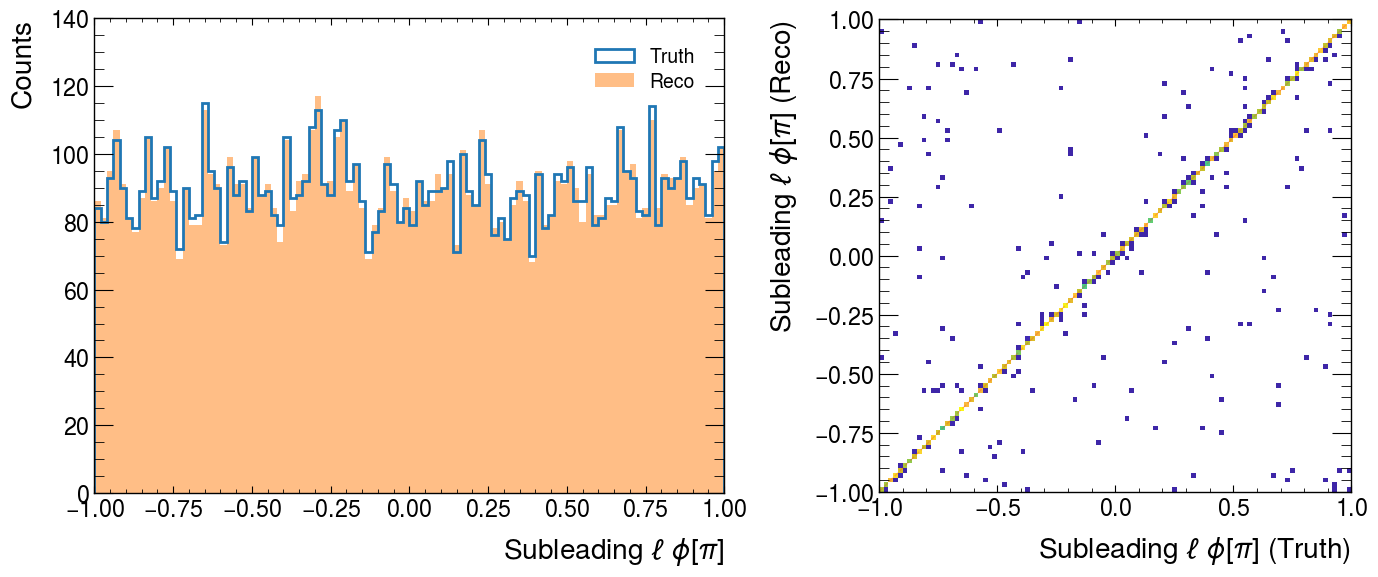

In [70]:
plt_range = [
    [0,200],
    [-3,3],
    [-1,1],
]
plt_bins=100
xlabel = [
    r'Subleading $\ell$ $P_T$ [GeV]',
    r'Subleading $\ell$ $\eta$',
    r'Subleading $\ell$ $\phi$[$\pi$]',
]
plt_names = [
    'reco_sllepton_pt',
    'reco_sllepton_eta',
    'reco_sllepton_phi',
]
f = [1,1,1/np.pi]
for i in range(3):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
    ax[0].hist(SubleadLep[:,i+5]*f[i],range=plt_range[i],bins=plt_bins,histtype='step',lw=2,label='Truth')
    ax[0].hist(recoSublead[:,i+5]*f[i],range=plt_range[i],bins=plt_bins,histtype='bar',alpha=0.5,label='Reco')
    ax[1].hist2d(SubleadLep[:,i+5]*f[i],recoSublead[:,i+5]*f[i],range=[plt_range[i],plt_range[i]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
    ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1,alpha=0.2)
    ax[1].set_box_aspect(1)
    ax[0].set_ylabel("Counts")   
    ax[0].set_xlabel(xlabel[i])
    ax[1].set_ylabel(xlabel[i]+' (Reco)')
    ax[1].set_xlabel(xlabel[i]+' (Truth)')
    ax[0].legend()
    plt.savefig(filepath+"plots/"+plt_names[i]+'.pdf')
    plt.show()
   

In [36]:
np.mean(truth_reco_lep_dR)#[truth_reco_lep_dR < 6])
np.mean(truth_reco_slep_dR)#[truth_reco_lep_dR < 6])

0.04471483191995476

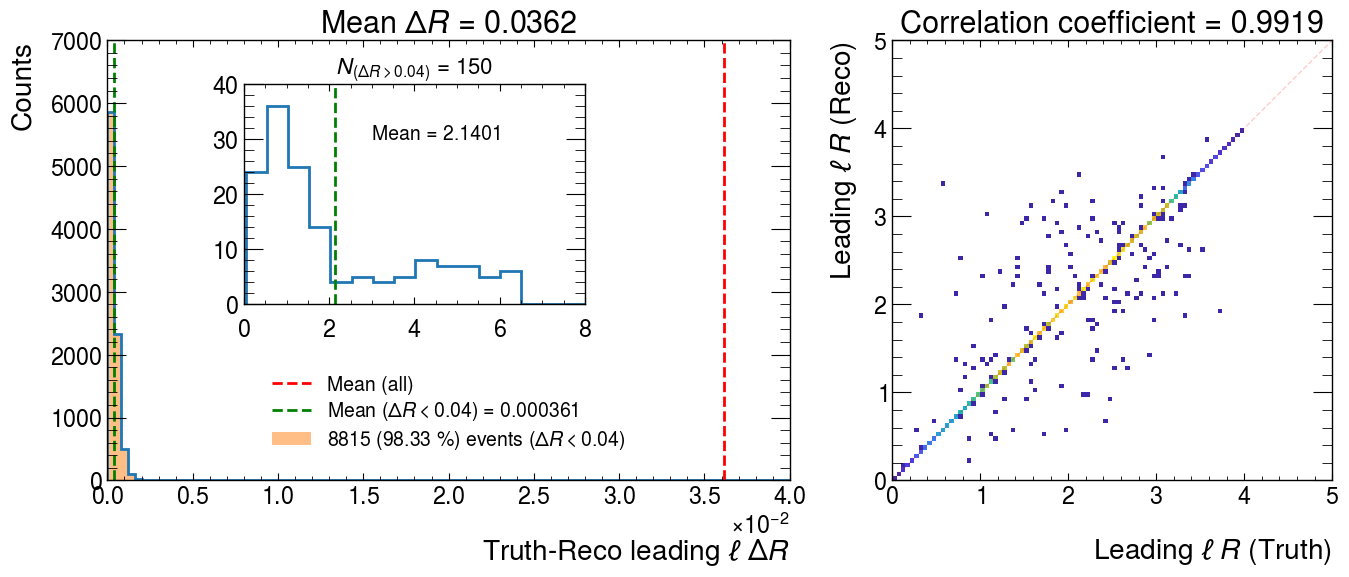

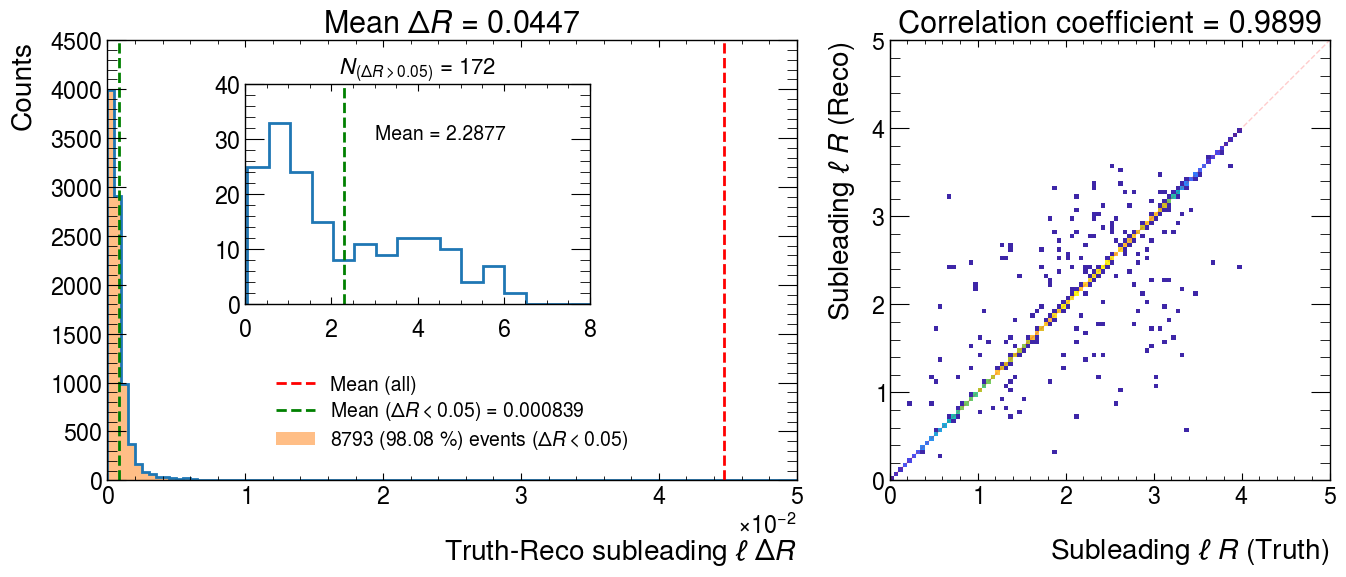

In [85]:
truth_leading_lep_R = np.sqrt((LeadingLep[:,-2]**2) + (LeadingLep[:,-1]**2)) 
reco_leading_lep_R = np.sqrt((recoLeading[:,-2]**2) + (recoLeading[:,-1]**2))
truth_reco_lep_dR = np.sqrt((LeadingLep[:,-2] - recoLeading[:,-2])**2 +\
                            (LeadingLep[:,-1] - recoLeading[:,-1])**2)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
ax[0].hist(truth_reco_lep_dR,range=[0,4E-2],bins=plt_bins,histtype='step',lw=2)
ax[0].hist(truth_reco_lep_dR[truth_reco_lep_dR<0.04],range=[0,4E-2],bins=plt_bins,histtype='bar',alpha=0.5,\
           label=r'%d (%.2f %%) events ($\Delta R< 0.04$)'%(len(truth_reco_lep_dR[truth_reco_lep_dR<0.01]),100*len(truth_reco_lep_dR[truth_reco_lep_dR<0.004])/len(truth_reco_lep_dR)))
ax[1].hist2d(truth_leading_lep_R,reco_leading_lep_R,range=[[0,5],[0,5]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
ins = ax[0].inset_axes([0.2,0.4,0.5,0.5])
ins.hist(truth_reco_lep_dR[truth_reco_lep_dR>4E-2],range=[4E-2,8],bins=16,histtype='step',lw=2)
ins.tick_params(axis='x',pad=10)
ins.set_title(r"$N_{(\Delta R > 0.04)}$ = %d"%(len(truth_reco_lep_dR[truth_reco_lep_dR>0.04])),fontsize=16)
ins.axvline(np.mean(truth_reco_lep_dR[truth_reco_lep_dR>0.04]),ls='dashed',color='g',lw=2)
ins.text(3,30,'Mean = {:.4f}'.format(np.mean(truth_reco_lep_dR[truth_reco_lep_dR>0.04])))
ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1,alpha=0.2)
ax[1].set_box_aspect(1)
ax[0].set_ylabel("Counts")   
ax[0].set_xlabel(r'Truth-Reco leading $\ell$ $\Delta R$',labelpad=20)
ax[1].set_ylabel(r'Leading $\ell$ $R$ (Reco)')
ax[1].set_xlabel(r'Leading $\ell$ $R$ (Truth)',labelpad=20)
ax[0].axvline(np.mean(truth_reco_lep_dR),color='r',ls='dashed',lw=2,label = 'Mean (all)')
ax[0].axvline(np.mean(truth_reco_lep_dR[truth_reco_lep_dR<0.04]),color='g',ls='dashed',lw=2,\
             label = r'Mean ($\Delta R < 0.04$) = %.6f'%(np.mean(truth_reco_lep_dR[truth_reco_lep_dR<0.04])))
ax[0].set_title(r'Mean $\Delta R$ = %.4f'%(np.mean(truth_reco_lep_dR)),fontsize=22)
corr = np.corrcoef(truth_leading_lep_R,reco_leading_lep_R)[0,1]
ax[1].set_title(r'Correlation coefficient = %.4f'%(corr),fontsize=22)
ax[0].legend(loc=8)
plt.savefig(filepath+"plots/"+'truth_reco_leading_dR'+'.pdf')
plt.show()

truth_sublead_lep_R = np.sqrt((SubleadLep[:,-2]**2) + (SubleadLep[:,-1]**2)) 
reco_sublead_lep_R = np.sqrt((recoSublead[:,-2]**2) + (recoSublead[:,-1]**2))
truth_reco_slep_dR = np.sqrt((SubleadLep[:,-2] - recoSublead[:,-2])**2 +\
                             (SubleadLep[:,-1] - recoSublead[:,-1])**2)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
ax[0].hist(truth_reco_slep_dR,range=[0,5E-2],bins=plt_bins,histtype='step',lw=2)
ax[0].hist(truth_reco_slep_dR[truth_reco_slep_dR < 0.05],range=[0,5E-2],bins=plt_bins,histtype='bar',alpha=0.5,\
           label=r'%d (%.2f %%) events ($\Delta R< 0.05$)'%(len(truth_reco_slep_dR[truth_reco_slep_dR<0.05]),100*len(truth_reco_slep_dR[truth_reco_slep_dR<0.05])/len(truth_reco_slep_dR)))
ins = ax[0].inset_axes([0.2,0.4,0.5,0.5])
ins.hist(truth_reco_slep_dR[truth_reco_slep_dR>5E-2],range=[5E-2,8],bins=16,histtype='step',lw=2)
ins.tick_params(axis='x',pad=10)
ins.set_title(r"$N_{(\Delta R > 0.05)}$ = %d"%(len(truth_reco_slep_dR[truth_reco_slep_dR>0.05])),fontsize=16)
ins.axvline(np.mean(truth_reco_slep_dR[truth_reco_slep_dR>0.05]),ls='dashed',color='g',lw=2)
ins.text(3,30,'Mean = {:.4f}'.format(np.mean(truth_reco_slep_dR[truth_reco_slep_dR>0.05])))
ax[1].hist2d(truth_sublead_lep_R,reco_sublead_lep_R,range=[[0,5],[0,5]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1,alpha=0.2)
ax[1].set_box_aspect(1)
ax[0].set_ylabel("Counts")   
ax[0].set_xlabel(r'Truth-Reco subleading $\ell$ $\Delta R$',labelpad=20)
ax[1].set_ylabel(r'Subleading $\ell$ $R$ (Reco)')
ax[1].set_xlabel(r'Subleading $\ell$ $R$ (Truth)',labelpad=20)
ax[0].axvline(np.mean(truth_reco_slep_dR),color='r',ls='dashed',lw=2,label = 'Mean (all)')
ax[0].axvline(np.mean(truth_reco_slep_dR[truth_reco_slep_dR<0.05]),color='g',ls='dashed',lw=2,\
             label = r'Mean ($\Delta R < 0.05$) = %.6f'%(np.mean(truth_reco_slep_dR[truth_reco_slep_dR<0.05])))
ax[0].set_title(r'Mean $\Delta R$ = %.4f'%(np.mean(truth_reco_slep_dR)),fontsize=22)
corr = np.corrcoef(truth_sublead_lep_R,reco_sublead_lep_R)[0,1]
ax[1].set_title(r'Correlation coefficient = %.4f'%(corr),fontsize=22)
ax[0].legend(loc=8)
plt.savefig(filepath+"plots/"+'truth_reco_sublead_dR'+'.pdf')
plt.show()

In [98]:
reco_truth_LL_dR = np.sqrt((recoLeading[:,-2] - LeadingLep[:,-2])**2 +\
                           (recoLeading[:,-1] - LeadingLep[:,-1])**2) # reco leading - truth leading dR
 
reco_truth_LS_dR = np.sqrt((recoLeading[:,-2] - SubleadLep[:,-2])**2 +\
                           (recoLeading[:,-1] - SubleadLep[:,-1])**2) # reco leading - truth subleading dR

reco_truth_SS_dR = np.sqrt((recoSublead[:,-2] - SubleadLep[:,-2])**2 +\
                           (recoSublead[:,-1] - SubleadLep[:,-1])**2) # reco subleading - truth subleading dR
 
reco_truth_SL_dR = np.sqrt((recoSublead[:,-2] - LeadingLep[:,-2])**2 +\
                           (recoSublead[:,-1] - LeadingLep[:,-1])**2) # reco subleading - truth leading dR

LL_dR_mismatch = np.where(reco_truth_LL_dR > reco_truth_SL_dR , True, False) 
SS_dR_mismatch = np.where(reco_truth_SS_dR >  reco_truth_LS_dR , True, False)
print(np.unique(LL_dR_mismatch, return_counts = True))
print(np.unique(SS_dR_mismatch, return_counts = True))
print(np.unique(LL_dR_mismatch&SS_dR_mismatch, return_counts = True))

LL_dR_mismatch_1 = np.where(reco_truth_LL_dR > reco_truth_LS_dR , True, False) 
SS_dR_mismatch_1 = np.where(reco_truth_SS_dR >  reco_truth_SL_dR , True, False)
print(np.unique(LL_dR_mismatch_1, return_counts = True))
print(np.unique(SS_dR_mismatch_1, return_counts = True))
print(np.unique(LL_dR_mismatch_1&SS_dR_mismatch_1, return_counts = True))

print(np.unique(LL_dR_mismatch&LL_dR_mismatch_1, return_counts = True))
print(np.unique(SS_dR_mismatch&SS_dR_mismatch_1, return_counts = True))
print(np.unique(LL_dR_mismatch_1&SS_dR_mismatch_1&LL_dR_mismatch&SS_dR_mismatch, return_counts = True))

(array([False,  True]), array([8835,  130]))
(array([False,  True]), array([8802,  163]))
(array([False,  True]), array([8838,  127]))
(array([False,  True]), array([8815,  150]))
(array([False,  True]), array([8818,  147]))
(array([False,  True]), array([8832,  133]))
(array([False,  True]), array([8835,  130]))
(array([False,  True]), array([8820,  145]))
(array([False,  True]), array([8841,  124]))


In [99]:
recoLeadingMatched = np.copy(recoLeading)
recoSubleadMatched = np.copy(recoSublead)
recoLeadingMatched_1 = np.copy(recoLeading)
recoSubleadMatched_1 = np.copy(recoSublead)
recoLeadingMatched_2 = np.copy(recoLeading)
recoSubleadMatched_2 = np.copy(recoSublead)
for i in range(len(recoLeading[0,:])):
    recoLeadingMatched[:,i] = np.where(LL_dR_mismatch&SS_dR_mismatch, recoSublead[:,i], recoLeading[:,i]) # if mismatch is true after AND , select sub-leading lepton
    recoSubleadMatched[:,i] = np.where(LL_dR_mismatch&SS_dR_mismatch, recoLeading[:,i], recoSublead[:,i]) # if mismatch is true after AND , select leading lepton
    recoLeadingMatched_1[:,i] = np.where(LL_dR_mismatch_1&SS_dR_mismatch_1, recoSublead[:,i], recoLeading[:,i]) # if mismatch is true after AND , select sub-leading lepton
    recoSubleadMatched_1[:,i] = np.where(LL_dR_mismatch_1&SS_dR_mismatch_1, recoLeading[:,i], recoSublead[:,i]) # if mismatch is true after AND , select leading lepton
    recoLeadingMatched_2[:,i] = np.where(LL_dR_mismatch_1&SS_dR_mismatch_1&LL_dR_mismatch&SS_dR_mismatch, recoSublead[:,i], recoLeading[:,i]) # if mismatch is true after AND , select sub-leading lepton
    recoSubleadMatched_2[:,i] = np.where(LL_dR_mismatch_1&SS_dR_mismatch_1&LL_dR_mismatch&SS_dR_mismatch, recoLeading[:,i], recoSublead[:,i]) # if mismatch is true after AND , select leading lepton

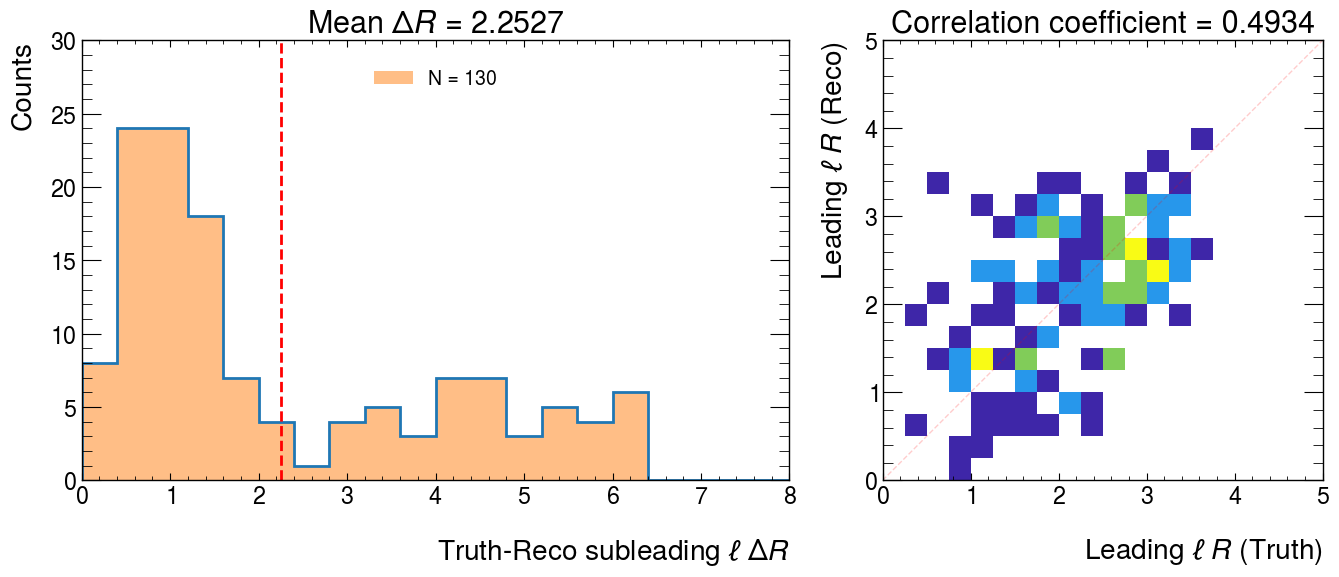

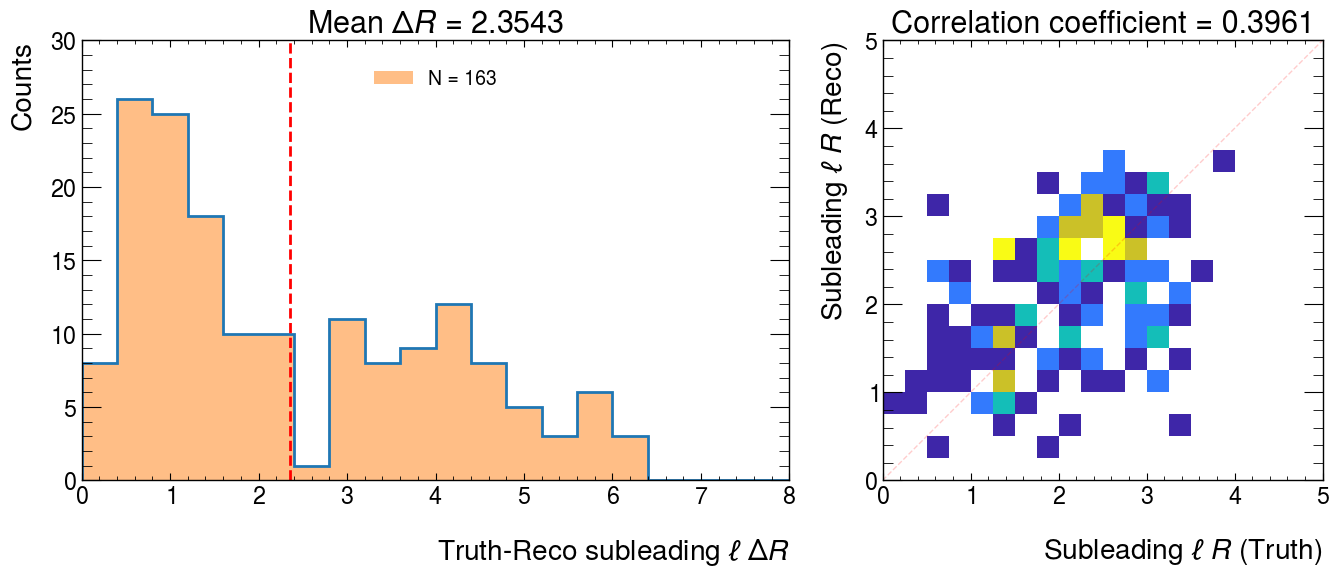

In [83]:
truth_leading_lep_R = np.sqrt((LeadingLep[LL_dR_mismatch,-2]**2) + (LeadingLep[LL_dR_mismatch,-1]**2)) 
truth_sublead_lep_R = np.sqrt((SubleadLep[SS_dR_mismatch,-2]**2) + (SubleadLep[SS_dR_mismatch,-1]**2)) 
mismatched_leading_lep_R = np.sqrt((recoLeading[LL_dR_mismatch,-2]**2) + (recoLeading[LL_dR_mismatch,-1]**2))
mismatched_sublead_lep_R = np.sqrt((recoSublead[SS_dR_mismatch,-2]**2) + (recoSublead[SS_dR_mismatch,-1]**2))
truth_mismatched_leading_dR = np.sqrt((LeadingLep[LL_dR_mismatch,-2] - recoLeading[LL_dR_mismatch,-2])**2 +\
                                      (LeadingLep[LL_dR_mismatch,-1] - recoLeading[LL_dR_mismatch,-1])**2)
truth_mismatched_sublead_dR = np.sqrt((SubleadLep[SS_dR_mismatch,-2] - recoSublead[SS_dR_mismatch,-2])**2 +\
                                      (SubleadLep[SS_dR_mismatch,-1] - recoSublead[SS_dR_mismatch,-1])**2)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
nbins=20
ax[0].hist(truth_mismatched_leading_dR,range=[0,8],bins=nbins,histtype='step',lw=2)
ax[0].hist(truth_mismatched_leading_dR[truth_mismatched_leading_dR < 8],range=[0,8],bins=nbins,histtype='bar',alpha=0.5,\
           label='N = {:d}'.format(len(truth_mismatched_leading_dR[truth_mismatched_leading_dR < 8])))
ax[1].hist2d(truth_leading_lep_R,mismatched_leading_lep_R,range=[[0,5],[0,5]],bins=[nbins,nbins],cmap=my_cmaps.parula("w"),vmin=1)
ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1,alpha=0.2)
ax[1].set_box_aspect(1)
ax[0].set_ylabel("Counts")   
ax[0].set_xlabel(r'Truth-Reco subleading $\ell$ $\Delta R$',labelpad=20)
ax[1].set_ylabel(r'Leading $\ell$ $R$ (Reco)')
ax[1].set_xlabel(r'Leading $\ell$ $R$ (Truth)',labelpad=20)
ax[0].axvline(np.mean(truth_mismatched_leading_dR),ls='dashed',lw=2,color='r')
ax[0].set_title(r"Mean $\Delta R$ = %.4f"%(np.mean(truth_mismatched_leading_dR)),fontsize=22)
corr = np.corrcoef(truth_leading_lep_R,mismatched_leading_lep_R)[0,1]
ax[1].set_title(r"Correlation coefficient = %.4f"%(corr),fontsize=22)
ax[0].legend(loc=9)
plt.savefig(filepath+"plots/"+'truth_mismatched_leading_dR'+'.pdf')
plt.show()
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
ax[0].hist(truth_mismatched_sublead_dR,range=[0,8],bins=nbins,histtype='step',lw=2)
ax[0].hist(truth_mismatched_sublead_dR[truth_mismatched_sublead_dR<8],range=[0,8],bins=nbins,histtype='bar',alpha=0.5,\
           label='N = {:d}'.format(len(truth_mismatched_sublead_dR[truth_mismatched_sublead_dR < 8])))
ax[1].hist2d(truth_sublead_lep_R,mismatched_sublead_lep_R,range=[[0,5],[0,5]],bins=[nbins,nbins],cmap=my_cmaps.parula("w"),vmin=1)
ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1,alpha=0.2)
ax[1].set_box_aspect(1)
ax[0].set_ylabel("Counts")   
ax[0].set_xlabel(r'Truth-Reco subleading $\ell$ $\Delta R$',labelpad=20)
ax[1].set_ylabel(r'Subleading $\ell$ $R$ (Reco)')
ax[1].set_xlabel(r'Subleading $\ell$ $R$ (Truth)',labelpad=20)
ax[0].axvline(np.mean(truth_mismatched_sublead_dR),ls='dashed',lw=2,color='r')
ax[0].set_title(r"Mean $\Delta R$ = %.4f"%(np.mean(truth_mismatched_sublead_dR)),fontsize=22)
corr = np.corrcoef(truth_sublead_lep_R,mismatched_sublead_lep_R)[0,1]
ax[1].set_title(r"Correlation coefficient = %.4f"%(corr),fontsize=22)
ax[0].legend(loc=9)
plt.savefig(filepath+"plots/"+'truth_mismatched_sublead_dR'+'.pdf')
plt.show()

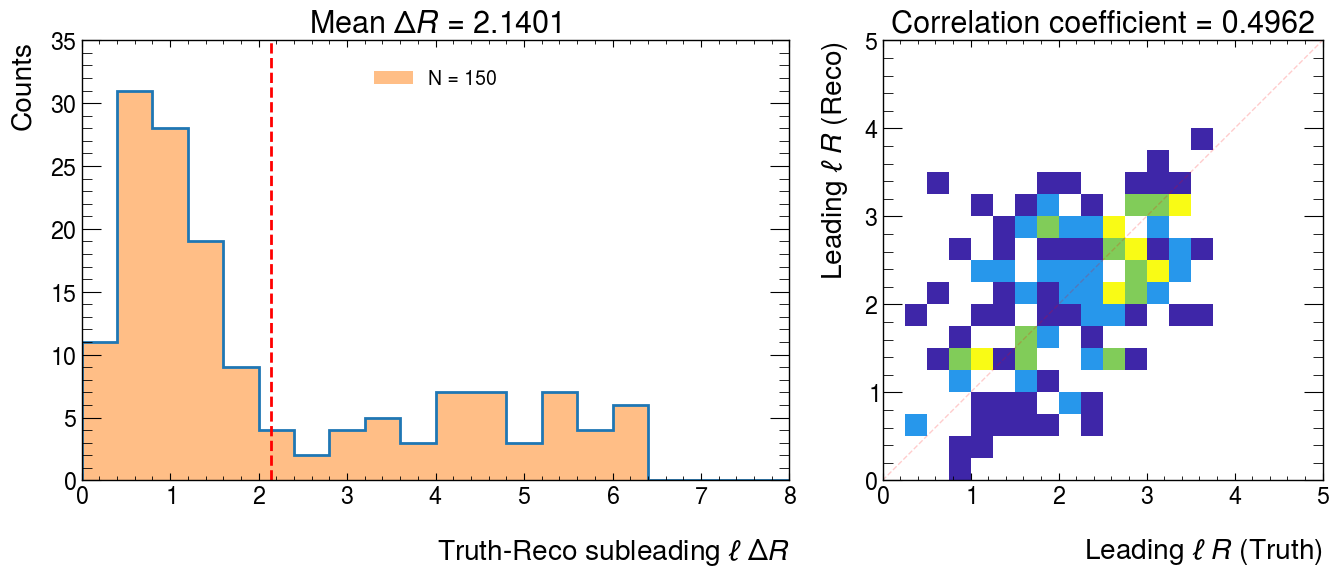

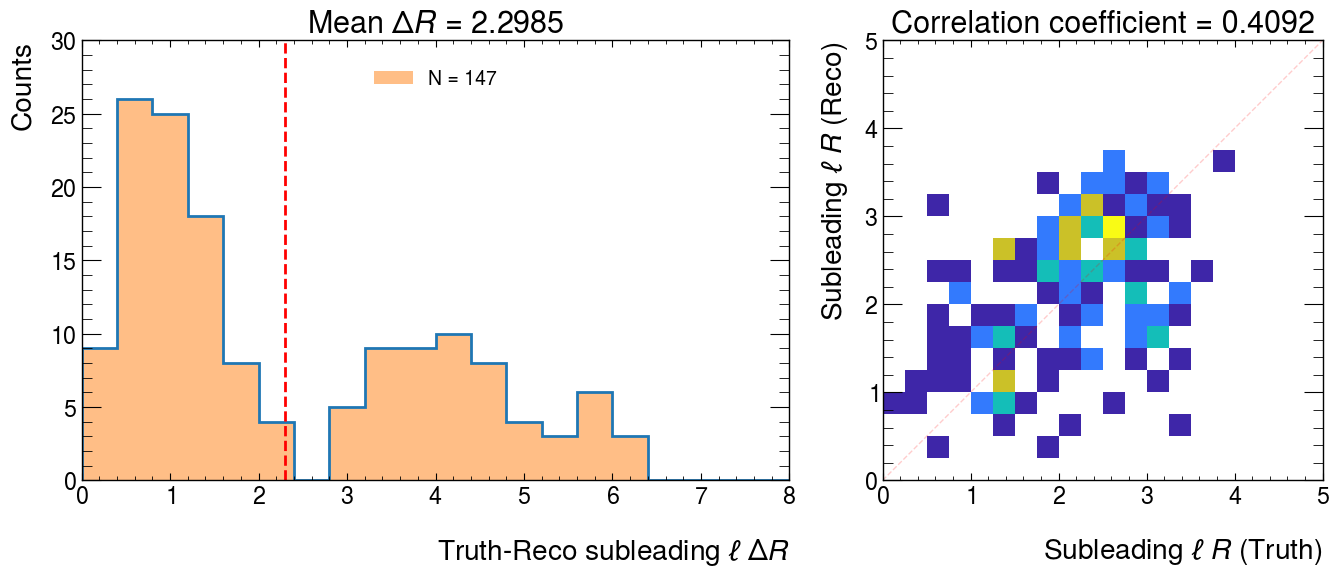

In [96]:
truth_leading_lep_R = np.sqrt((LeadingLep[LL_dR_mismatch_1,-2]**2) + (LeadingLep[LL_dR_mismatch_1,-1]**2)) 
truth_sublead_lep_R = np.sqrt((SubleadLep[SS_dR_mismatch_1,-2]**2) + (SubleadLep[SS_dR_mismatch_1,-1]**2)) 
mismatched_leading_lep_R = np.sqrt((recoLeading[LL_dR_mismatch_1,-2]**2) + (recoLeading[LL_dR_mismatch_1,-1]**2))
mismatched_sublead_lep_R = np.sqrt((recoSublead[SS_dR_mismatch_1,-2]**2) + (recoSublead[SS_dR_mismatch_1,-1]**2))
truth_mismatched_leading_dR = np.sqrt((LeadingLep[LL_dR_mismatch_1,-2] - recoLeading[LL_dR_mismatch_1,-2])**2 +\
                                      (LeadingLep[LL_dR_mismatch_1,-1] - recoLeading[LL_dR_mismatch_1,-1])**2)
truth_mismatched_sublead_dR = np.sqrt((SubleadLep[SS_dR_mismatch_1,-2] - recoSublead[SS_dR_mismatch_1,-2])**2 +\
                                      (SubleadLep[SS_dR_mismatch_1,-1] - recoSublead[SS_dR_mismatch_1,-1])**2)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
nbins=20
ax[0].hist(truth_mismatched_leading_dR,range=[0,8],bins=nbins,histtype='step',lw=2)
ax[0].hist(truth_mismatched_leading_dR[truth_mismatched_leading_dR < 8],range=[0,8],bins=nbins,histtype='bar',alpha=0.5,\
           label='N = {:d}'.format(len(truth_mismatched_leading_dR[truth_mismatched_leading_dR < 8])))
ax[1].hist2d(truth_leading_lep_R,mismatched_leading_lep_R,range=[[0,5],[0,5]],bins=[nbins,nbins],cmap=my_cmaps.parula("w"),vmin=1)
ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1,alpha=0.2)
ax[1].set_box_aspect(1)
ax[0].set_ylabel("Counts")   
ax[0].set_xlabel(r'Truth-Reco subleading $\ell$ $\Delta R$',labelpad=20)
ax[1].set_ylabel(r'Leading $\ell$ $R$ (Reco)')
ax[1].set_xlabel(r'Leading $\ell$ $R$ (Truth)',labelpad=20)
ax[0].axvline(np.mean(truth_mismatched_leading_dR),ls='dashed',lw=2,color='r')
ax[0].set_title(r"Mean $\Delta R$ = %.4f"%(np.mean(truth_mismatched_leading_dR)),fontsize=22)
corr = np.corrcoef(truth_leading_lep_R,mismatched_leading_lep_R)[0,1]
ax[1].set_title(r"Correlation coefficient = %.4f"%(corr),fontsize=22)
ax[0].legend(loc=9)
plt.savefig(filepath+"plots/"+'truth_mismatched_leading_dR_1'+'.pdf')
plt.show()
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
ax[0].hist(truth_mismatched_sublead_dR,range=[0,8],bins=nbins,histtype='step',lw=2)
ax[0].hist(truth_mismatched_sublead_dR[truth_mismatched_sublead_dR<8],range=[0,8],bins=nbins,histtype='bar',alpha=0.5,\
           label='N = {:d}'.format(len(truth_mismatched_sublead_dR[truth_mismatched_sublead_dR < 8])))
ax[1].hist2d(truth_sublead_lep_R,mismatched_sublead_lep_R,range=[[0,5],[0,5]],bins=[nbins,nbins],cmap=my_cmaps.parula("w"),vmin=1)
ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1,alpha=0.2)
ax[1].set_box_aspect(1)
ax[0].set_ylabel("Counts")   
ax[0].set_xlabel(r'Truth-Reco subleading $\ell$ $\Delta R$',labelpad=20)
ax[1].set_ylabel(r'Subleading $\ell$ $R$ (Reco)')
ax[1].set_xlabel(r'Subleading $\ell$ $R$ (Truth)',labelpad=20)
ax[0].axvline(np.mean(truth_mismatched_sublead_dR),ls='dashed',lw=2,color='r')
ax[0].set_title(r"Mean $\Delta R$ = %.4f"%(np.mean(truth_mismatched_sublead_dR)),fontsize=22)
corr = np.corrcoef(truth_sublead_lep_R,mismatched_sublead_lep_R)[0,1]
ax[1].set_title(r"Correlation coefficient = %.4f"%(corr),fontsize=22)
ax[0].legend(loc=9)
plt.savefig(filepath+"plots/"+'truth_mismatched_sublead_dR_1'+'.pdf')
plt.show()

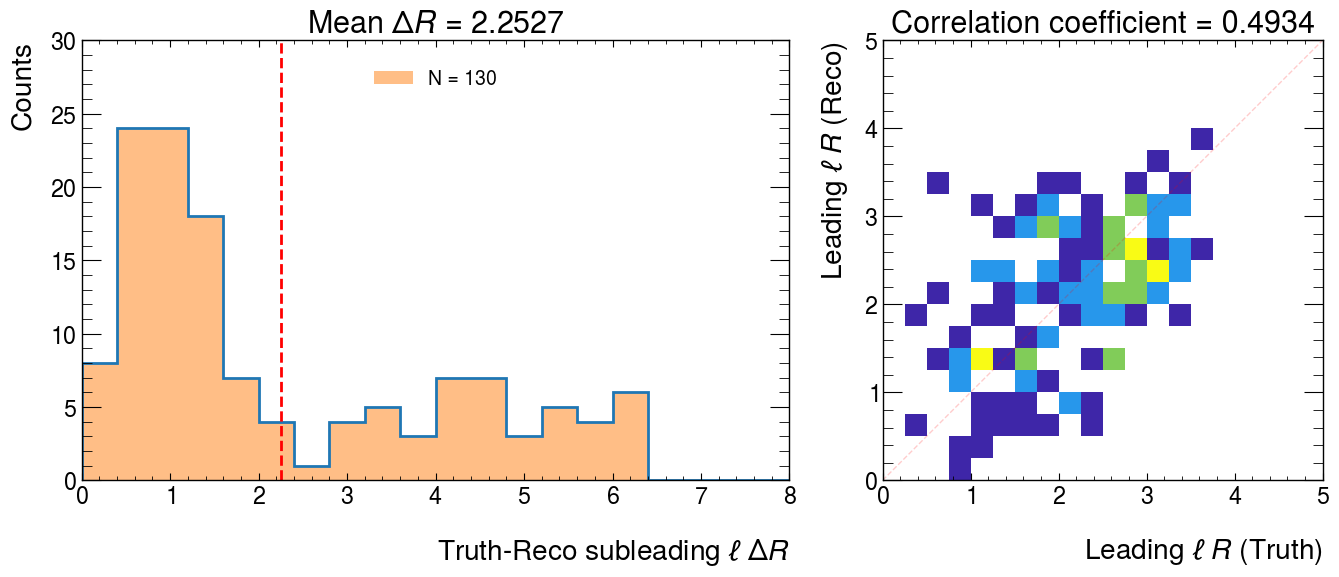

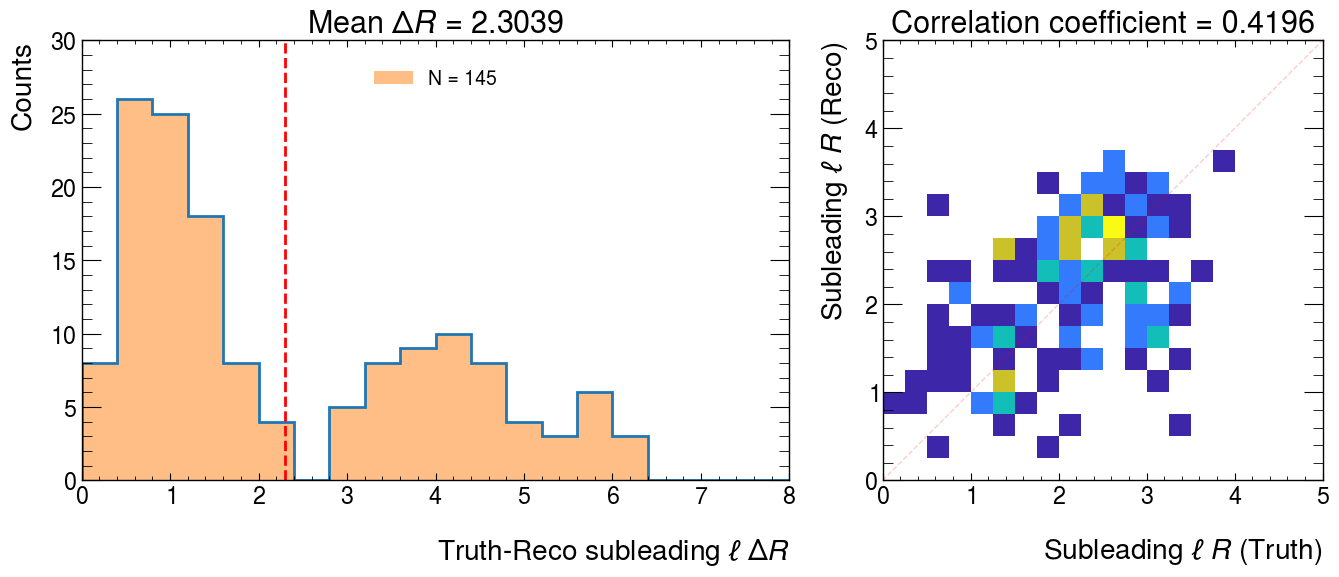

In [97]:
truth_leading_lep_R = np.sqrt((LeadingLep[LL_dR_mismatch&LL_dR_mismatch_1,-2]**2) + (LeadingLep[LL_dR_mismatch&LL_dR_mismatch_1,-1]**2)) 
truth_sublead_lep_R = np.sqrt((SubleadLep[SS_dR_mismatch&SS_dR_mismatch_1,-2]**2) + (SubleadLep[SS_dR_mismatch&SS_dR_mismatch_1,-1]**2)) 
mismatched_leading_lep_R = np.sqrt((recoLeading[LL_dR_mismatch&LL_dR_mismatch_1,-2]**2) + (recoLeading[LL_dR_mismatch&LL_dR_mismatch_1,-1]**2))
mismatched_sublead_lep_R = np.sqrt((recoSublead[SS_dR_mismatch&SS_dR_mismatch_1,-2]**2) + (recoSublead[SS_dR_mismatch&SS_dR_mismatch_1,-1]**2))
truth_mismatched_leading_dR = np.sqrt((LeadingLep[LL_dR_mismatch&LL_dR_mismatch_1,-2] - recoLeading[LL_dR_mismatch&LL_dR_mismatch_1,-2])**2 +\
                                      (LeadingLep[LL_dR_mismatch&LL_dR_mismatch_1,-1] - recoLeading[LL_dR_mismatch&LL_dR_mismatch_1,-1])**2)
truth_mismatched_sublead_dR = np.sqrt((SubleadLep[SS_dR_mismatch&SS_dR_mismatch_1,-2] - recoSublead[SS_dR_mismatch&SS_dR_mismatch_1,-2])**2 +\
                                      (SubleadLep[SS_dR_mismatch&SS_dR_mismatch_1,-1] - recoSublead[SS_dR_mismatch&SS_dR_mismatch_1,-1])**2)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
nbins=20
ax[0].hist(truth_mismatched_leading_dR,range=[0,8],bins=nbins,histtype='step',lw=2)
ax[0].hist(truth_mismatched_leading_dR[truth_mismatched_leading_dR < 8],range=[0,8],bins=nbins,histtype='bar',alpha=0.5,\
           label='N = {:d}'.format(len(truth_mismatched_leading_dR[truth_mismatched_leading_dR < 8])))
ax[1].hist2d(truth_leading_lep_R,mismatched_leading_lep_R,range=[[0,5],[0,5]],bins=[nbins,nbins],cmap=my_cmaps.parula("w"),vmin=1)
ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1,alpha=0.2)
ax[1].set_box_aspect(1)
ax[0].set_ylabel("Counts")   
ax[0].set_xlabel(r'Truth-Reco subleading $\ell$ $\Delta R$',labelpad=20)
ax[1].set_ylabel(r'Leading $\ell$ $R$ (Reco)')
ax[1].set_xlabel(r'Leading $\ell$ $R$ (Truth)',labelpad=20)
ax[0].axvline(np.mean(truth_mismatched_leading_dR),ls='dashed',lw=2,color='r')
ax[0].set_title(r"Mean $\Delta R$ = %.4f"%(np.mean(truth_mismatched_leading_dR)),fontsize=22)
corr = np.corrcoef(truth_leading_lep_R,mismatched_leading_lep_R)[0,1]
ax[1].set_title(r"Correlation coefficient = %.4f"%(corr),fontsize=22)
ax[0].legend(loc=9)
plt.savefig(filepath+"plots/"+'truth_mismatched_leading_dR_2'+'.pdf')
plt.show()
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
ax[0].hist(truth_mismatched_sublead_dR,range=[0,8],bins=nbins,histtype='step',lw=2)
ax[0].hist(truth_mismatched_sublead_dR[truth_mismatched_sublead_dR<8],range=[0,8],bins=nbins,histtype='bar',alpha=0.5,\
           label='N = {:d}'.format(len(truth_mismatched_sublead_dR[truth_mismatched_sublead_dR < 8])))
ax[1].hist2d(truth_sublead_lep_R,mismatched_sublead_lep_R,range=[[0,5],[0,5]],bins=[nbins,nbins],cmap=my_cmaps.parula("w"),vmin=1)
ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1,alpha=0.2)
ax[1].set_box_aspect(1)
ax[0].set_ylabel("Counts")   
ax[0].set_xlabel(r'Truth-Reco subleading $\ell$ $\Delta R$',labelpad=20)
ax[1].set_ylabel(r'Subleading $\ell$ $R$ (Reco)')
ax[1].set_xlabel(r'Subleading $\ell$ $R$ (Truth)',labelpad=20)
ax[0].axvline(np.mean(truth_mismatched_sublead_dR),ls='dashed',lw=2,color='r')
ax[0].set_title(r"Mean $\Delta R$ = %.4f"%(np.mean(truth_mismatched_sublead_dR)),fontsize=22)
corr = np.corrcoef(truth_sublead_lep_R,mismatched_sublead_lep_R)[0,1]
ax[1].set_title(r"Correlation coefficient = %.4f"%(corr),fontsize=22)
ax[0].legend(loc=9)
plt.savefig(filepath+"plots/"+'truth_mismatched_sublead_dR_2'+'.pdf')
plt.show()

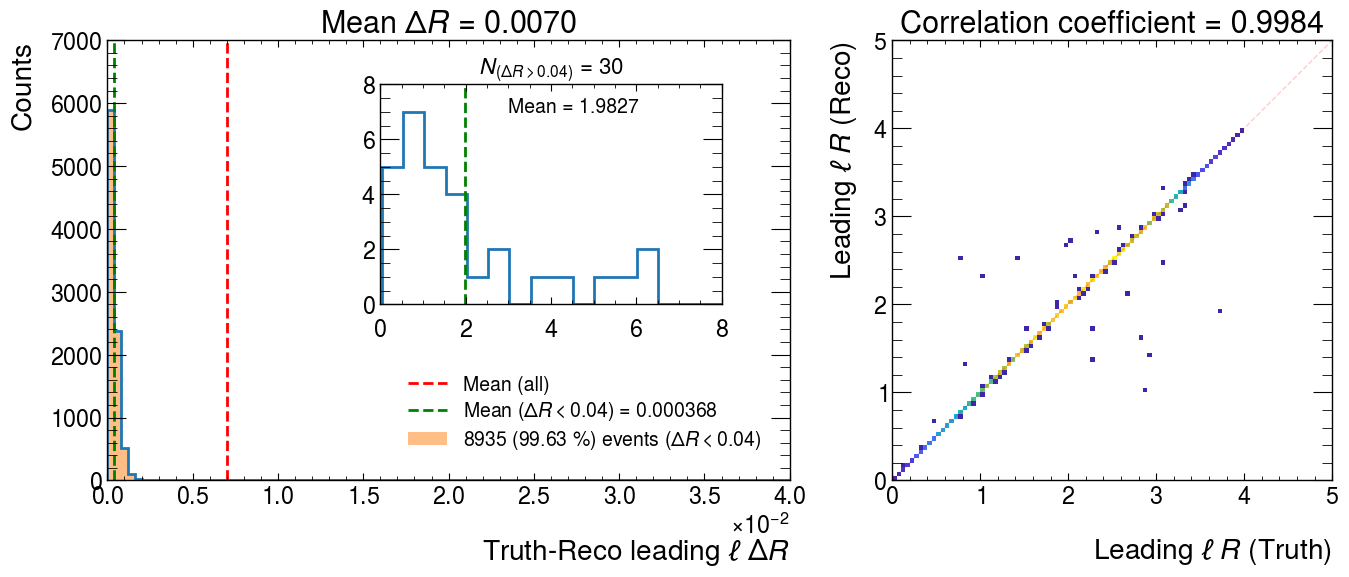

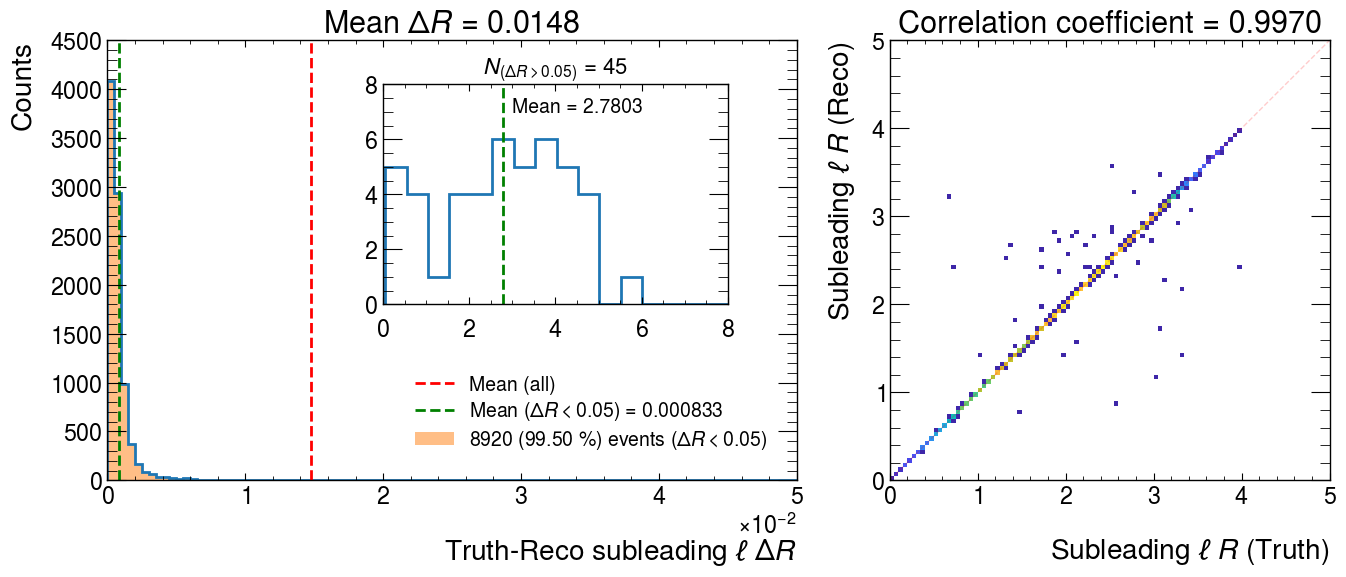

In [93]:
truth_leading_lep_R = np.sqrt((LeadingLep[:,-2]**2) + (LeadingLep[:,-1]**2)) 
reco_leading_lep_R = np.sqrt((recoLeadingMatched[:,-2]**2) + (recoLeadingMatched[:,-1]**2))
truth_reco_lep_dR = np.sqrt((LeadingLep[:,-2] - recoLeadingMatched[:,-2])**2 +\
                            (LeadingLep[:,-1] - recoLeadingMatched[:,-1])**2)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
ax[0].hist(truth_reco_lep_dR,range=[0,4E-2],bins=plt_bins,histtype='step',lw=2)
ax[0].hist(truth_reco_lep_dR[truth_reco_lep_dR<0.04],range=[0,4E-2],bins=plt_bins,histtype='bar',alpha=0.5,\
           label=r'%d (%.2f %%) events ($\Delta R< 0.04$)'%(len(truth_reco_lep_dR[truth_reco_lep_dR<0.01]),100*len(truth_reco_lep_dR[truth_reco_lep_dR<0.004])/len(truth_reco_lep_dR)))
ax[1].hist2d(truth_leading_lep_R,reco_leading_lep_R,range=[[0,5],[0,5]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
ins = ax[0].inset_axes([0.4,0.4,0.5,0.5])
ins.hist(truth_reco_lep_dR[truth_reco_lep_dR>4E-2],range=[4E-2,8],bins=16,histtype='step',lw=2)
ins.tick_params(axis='x',pad=10)
ins.set_title(r"$N_{(\Delta R > 0.04)}$ = %d"%(len(truth_reco_lep_dR[truth_reco_lep_dR>0.04])),fontsize=16)
ins.axvline(np.mean(truth_reco_lep_dR[truth_reco_lep_dR>0.04]),ls='dashed',color='g',lw=2)
ins.text(3,7,'Mean = {:.4f}'.format(np.mean(truth_reco_lep_dR[truth_reco_lep_dR>0.04])))
ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1,alpha=0.2)
ax[1].set_box_aspect(1)
ax[0].set_ylabel("Counts")   
ax[0].set_xlabel(r'Truth-Reco leading $\ell$ $\Delta R$',labelpad=20)
ax[1].set_ylabel(r'Leading $\ell$ $R$ (Reco)')
ax[1].set_xlabel(r'Leading $\ell$ $R$ (Truth)',labelpad=20)
ax[0].axvline(np.mean(truth_reco_lep_dR),color='r',ls='dashed',lw=2,label = 'Mean (all)')
ax[0].axvline(np.mean(truth_reco_lep_dR[truth_reco_lep_dR<0.04]),color='g',ls='dashed',lw=2,\
             label = r'Mean ($\Delta R < 0.04$) = %.6f'%(np.mean(truth_reco_lep_dR[truth_reco_lep_dR<0.04])))
ax[0].set_title(r'Mean $\Delta R$ = %.4f'%(np.mean(truth_reco_lep_dR)),fontsize=22)
corr = np.corrcoef(truth_leading_lep_R,reco_leading_lep_R)[0,1]
ax[1].set_title(r'Correlation coefficient = %.4f'%(corr),fontsize=22)
ax[0].legend(loc=4)
plt.savefig(filepath+"plots/"+'truth_matched_leading_dR'+'.pdf')
plt.show()

truth_sublead_lep_R = np.sqrt((SubleadLep[:,-2]**2) + (SubleadLep[:,-1]**2)) 
reco_sublead_lep_R = np.sqrt((recoSubleadMatched[:,-2]**2) + (recoSubleadMatched[:,-1]**2))
truth_reco_slep_dR = np.sqrt((SubleadLep[:,-2] - recoSubleadMatched[:,-2])**2 +\
                             (SubleadLep[:,-1] - recoSubleadMatched[:,-1])**2)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
ax[0].hist(truth_reco_slep_dR,range=[0,5E-2],bins=plt_bins,histtype='step',lw=2)
ax[0].hist(truth_reco_slep_dR[truth_reco_slep_dR < 0.05],range=[0,5E-2],bins=plt_bins,histtype='bar',alpha=0.5,\
           label=r'%d (%.2f %%) events ($\Delta R< 0.05$)'%(len(truth_reco_slep_dR[truth_reco_slep_dR<0.05]),100*len(truth_reco_slep_dR[truth_reco_slep_dR<0.05])/len(truth_reco_slep_dR)))
ins = ax[0].inset_axes([0.4,0.4,0.5,0.5])
ins.hist(truth_reco_slep_dR[truth_reco_slep_dR>5E-2],range=[5E-2,8],bins=16,histtype='step',lw=2)
ins.tick_params(axis='x',pad=10)
ins.set_title(r"$N_{(\Delta R > 0.05)}$ = %d"%(len(truth_reco_slep_dR[truth_reco_slep_dR>0.05])),fontsize=16)
ins.axvline(np.mean(truth_reco_slep_dR[truth_reco_slep_dR>0.05]),ls='dashed',color='g',lw=2)
ins.text(3,7,'Mean = {:.4f}'.format(np.mean(truth_reco_slep_dR[truth_reco_slep_dR>0.05])))
ax[1].hist2d(truth_sublead_lep_R,reco_sublead_lep_R,range=[[0,5],[0,5]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1,alpha=0.2)
ax[1].set_box_aspect(1)
ax[0].set_ylabel("Counts")   
ax[0].set_xlabel(r'Truth-Reco subleading $\ell$ $\Delta R$',labelpad=20)
ax[1].set_ylabel(r'Subleading $\ell$ $R$ (Reco)')
ax[1].set_xlabel(r'Subleading $\ell$ $R$ (Truth)',labelpad=20)
ax[0].axvline(np.mean(truth_reco_slep_dR),color='r',ls='dashed',lw=2,label = 'Mean (all)')
ax[0].axvline(np.mean(truth_reco_slep_dR[truth_reco_slep_dR<0.05]),color='g',ls='dashed',lw=2,\
             label = r'Mean ($\Delta R < 0.05$) = %.6f'%(np.mean(truth_reco_slep_dR[truth_reco_slep_dR<0.05])))
ax[0].set_title(r'Mean $\Delta R$ = %.4f'%(np.mean(truth_reco_slep_dR)),fontsize=22)
corr = np.corrcoef(truth_sublead_lep_R,reco_sublead_lep_R)[0,1]
ax[1].set_title(r'Correlation coefficient = %.4f'%(corr),fontsize=22)
ax[0].legend(loc=4)
plt.savefig(filepath+"plots/"+'truth_matched_sublead_dR'+'.pdf')
plt.show()

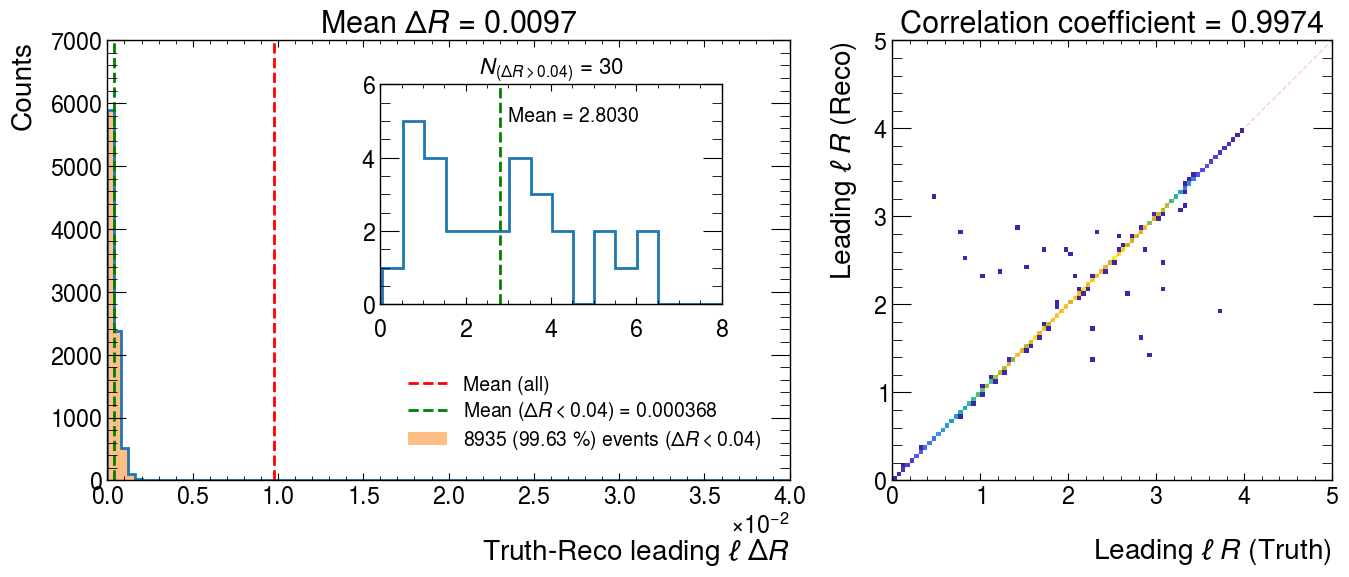

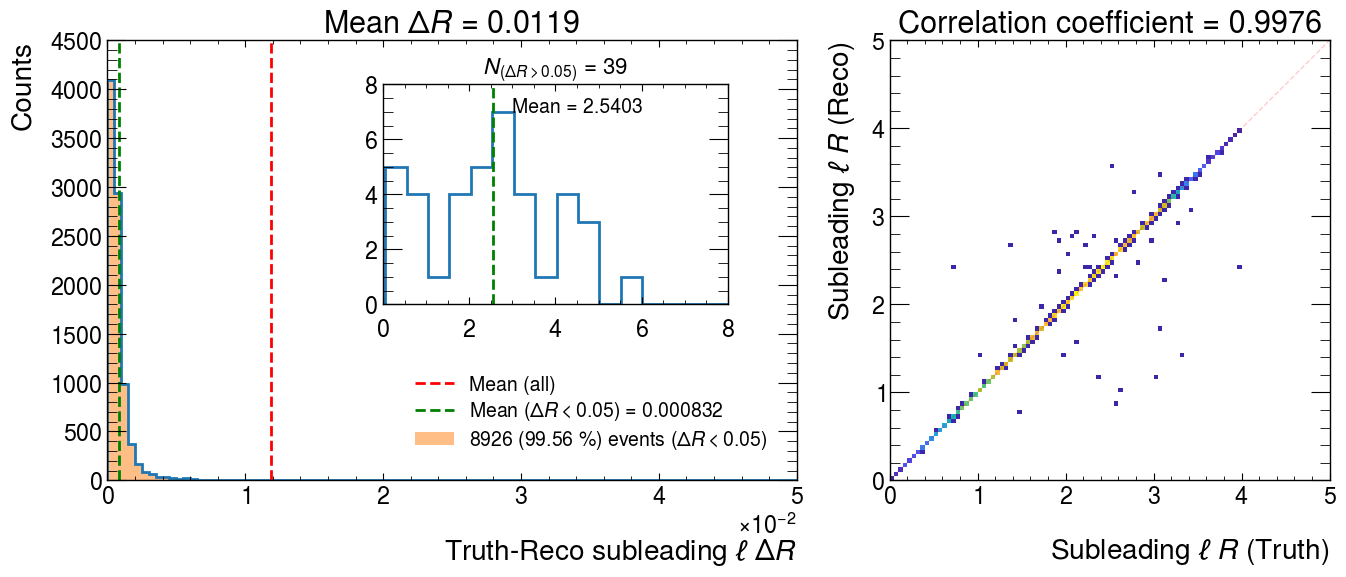

In [95]:
truth_leading_lep_R = np.sqrt((LeadingLep[:,-2]**2) + (LeadingLep[:,-1]**2)) 
reco_leading_lep_R = np.sqrt((recoLeadingMatched_1[:,-2]**2) + (recoLeadingMatched_1[:,-1]**2))
truth_reco_lep_dR = np.sqrt((LeadingLep[:,-2] - recoLeadingMatched_1[:,-2])**2 +\
                            (LeadingLep[:,-1] - recoLeadingMatched_1[:,-1])**2)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
ax[0].hist(truth_reco_lep_dR,range=[0,4E-2],bins=plt_bins,histtype='step',lw=2)
ax[0].hist(truth_reco_lep_dR[truth_reco_lep_dR<0.04],range=[0,4E-2],bins=plt_bins,histtype='bar',alpha=0.5,\
           label=r'%d (%.2f %%) events ($\Delta R< 0.04$)'%(len(truth_reco_lep_dR[truth_reco_lep_dR<0.01]),100*len(truth_reco_lep_dR[truth_reco_lep_dR<0.004])/len(truth_reco_lep_dR)))
ax[1].hist2d(truth_leading_lep_R,reco_leading_lep_R,range=[[0,5],[0,5]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
ins = ax[0].inset_axes([0.4,0.4,0.5,0.5])
ins.hist(truth_reco_lep_dR[truth_reco_lep_dR>4E-2],range=[4E-2,8],bins=16,histtype='step',lw=2)
ins.tick_params(axis='x',pad=10)
ins.set_title(r"$N_{(\Delta R > 0.04)}$ = %d"%(len(truth_reco_lep_dR[truth_reco_lep_dR>0.04])),fontsize=16)
ins.axvline(np.mean(truth_reco_lep_dR[truth_reco_lep_dR>0.04]),ls='dashed',color='g',lw=2)
ins.text(3,5,'Mean = {:.4f}'.format(np.mean(truth_reco_lep_dR[truth_reco_lep_dR>0.04])))
ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1,alpha=0.2)
ax[1].set_box_aspect(1)
ax[0].set_ylabel("Counts")   
ax[0].set_xlabel(r'Truth-Reco leading $\ell$ $\Delta R$',labelpad=20)
ax[1].set_ylabel(r'Leading $\ell$ $R$ (Reco)')
ax[1].set_xlabel(r'Leading $\ell$ $R$ (Truth)',labelpad=20)
ax[0].axvline(np.mean(truth_reco_lep_dR),color='r',ls='dashed',lw=2,label = 'Mean (all)')
ax[0].axvline(np.mean(truth_reco_lep_dR[truth_reco_lep_dR<0.04]),color='g',ls='dashed',lw=2,\
             label = r'Mean ($\Delta R < 0.04$) = %.6f'%(np.mean(truth_reco_lep_dR[truth_reco_lep_dR<0.04])))
ax[0].set_title(r'Mean $\Delta R$ = %.4f'%(np.mean(truth_reco_lep_dR)),fontsize=22)
corr = np.corrcoef(truth_leading_lep_R,reco_leading_lep_R)[0,1]
ax[1].set_title(r'Correlation coefficient = %.4f'%(corr),fontsize=22)
ax[0].legend(loc=4)
plt.savefig(filepath+"plots/"+'truth_matched_leading_dR_1'+'.pdf')
plt.show()

truth_sublead_lep_R = np.sqrt((SubleadLep[:,-2]**2) + (SubleadLep[:,-1]**2)) 
reco_sublead_lep_R = np.sqrt((recoSubleadMatched_1[:,-2]**2) + (recoSubleadMatched_1[:,-1]**2))
truth_reco_slep_dR = np.sqrt((SubleadLep[:,-2] - recoSubleadMatched_1[:,-2])**2 +\
                             (SubleadLep[:,-1] - recoSubleadMatched_1[:,-1])**2)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
ax[0].hist(truth_reco_slep_dR,range=[0,5E-2],bins=plt_bins,histtype='step',lw=2)
ax[0].hist(truth_reco_slep_dR[truth_reco_slep_dR < 0.05],range=[0,5E-2],bins=plt_bins,histtype='bar',alpha=0.5,\
           label=r'%d (%.2f %%) events ($\Delta R< 0.05$)'%(len(truth_reco_slep_dR[truth_reco_slep_dR<0.05]),100*len(truth_reco_slep_dR[truth_reco_slep_dR<0.05])/len(truth_reco_slep_dR)))
ins = ax[0].inset_axes([0.4,0.4,0.5,0.5])
ins.hist(truth_reco_slep_dR[truth_reco_slep_dR>5E-2],range=[5E-2,8],bins=16,histtype='step',lw=2)
ins.tick_params(axis='x',pad=10)
ins.set_title(r"$N_{(\Delta R > 0.05)}$ = %d"%(len(truth_reco_slep_dR[truth_reco_slep_dR>0.05])),fontsize=16)
ins.axvline(np.mean(truth_reco_slep_dR[truth_reco_slep_dR>0.05]),ls='dashed',color='g',lw=2)
ins.text(3,7,'Mean = {:.4f}'.format(np.mean(truth_reco_slep_dR[truth_reco_slep_dR>0.05])))
ax[1].hist2d(truth_sublead_lep_R,reco_sublead_lep_R,range=[[0,5],[0,5]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1,alpha=0.2)
ax[1].set_box_aspect(1)
ax[0].set_ylabel("Counts")   
ax[0].set_xlabel(r'Truth-Reco subleading $\ell$ $\Delta R$',labelpad=20)
ax[1].set_ylabel(r'Subleading $\ell$ $R$ (Reco)')
ax[1].set_xlabel(r'Subleading $\ell$ $R$ (Truth)',labelpad=20)
ax[0].axvline(np.mean(truth_reco_slep_dR),color='r',ls='dashed',lw=2,label = 'Mean (all)')
ax[0].axvline(np.mean(truth_reco_slep_dR[truth_reco_slep_dR<0.05]),color='g',ls='dashed',lw=2,\
             label = r'Mean ($\Delta R < 0.05$) = %.6f'%(np.mean(truth_reco_slep_dR[truth_reco_slep_dR<0.05])))
ax[0].set_title(r'Mean $\Delta R$ = %.4f'%(np.mean(truth_reco_slep_dR)),fontsize=22)
corr = np.corrcoef(truth_sublead_lep_R,reco_sublead_lep_R)[0,1]
ax[1].set_title(r'Correlation coefficient = %.4f'%(corr),fontsize=22)
ax[0].legend(loc=4)
plt.savefig(filepath+"plots/"+'truth_matched_sublead_dR_1'+'.pdf')
plt.show()

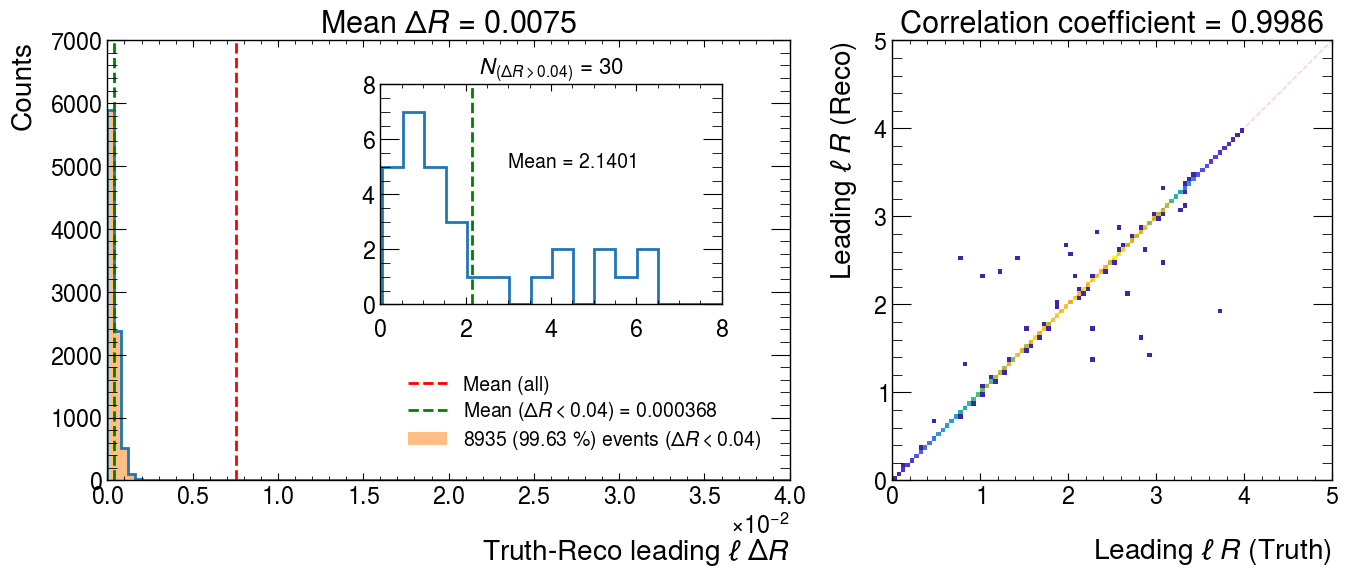

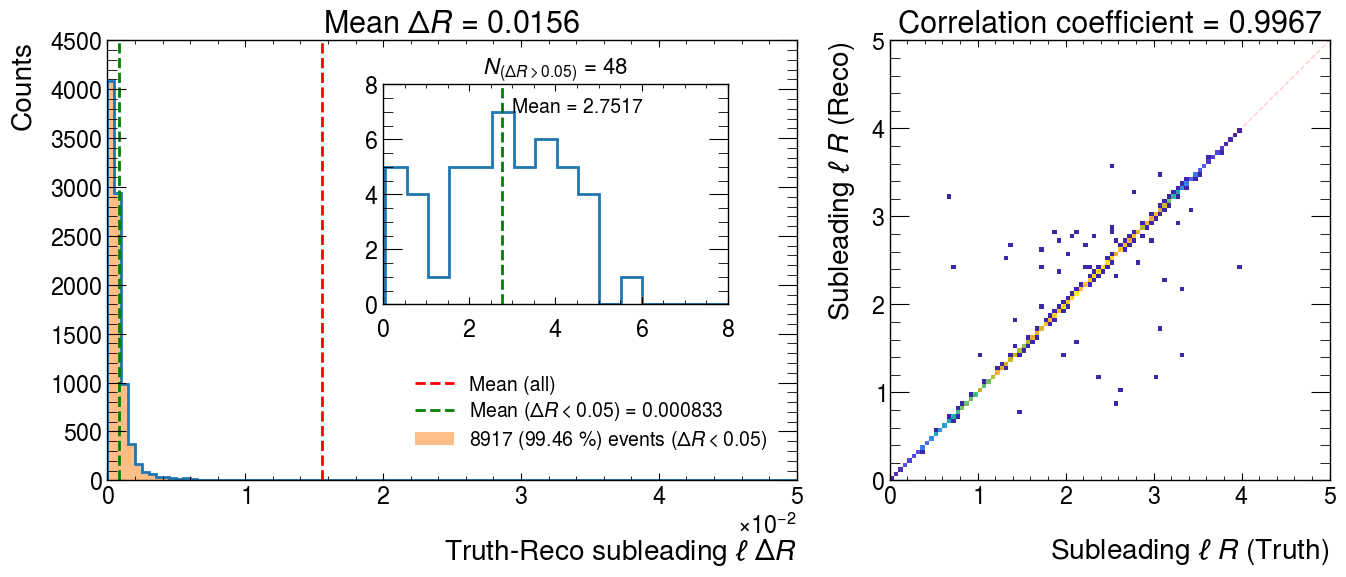

In [100]:
truth_leading_lep_R = np.sqrt((LeadingLep[:,-2]**2) + (LeadingLep[:,-1]**2)) 
reco_leading_lep_R = np.sqrt((recoLeadingMatched_2[:,-2]**2) + (recoLeadingMatched_2[:,-1]**2))
truth_reco_lep_dR = np.sqrt((LeadingLep[:,-2] - recoLeadingMatched_2[:,-2])**2 +\
                            (LeadingLep[:,-1] - recoLeadingMatched_2[:,-1])**2)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
ax[0].hist(truth_reco_lep_dR,range=[0,4E-2],bins=plt_bins,histtype='step',lw=2)
ax[0].hist(truth_reco_lep_dR[truth_reco_lep_dR<0.04],range=[0,4E-2],bins=plt_bins,histtype='bar',alpha=0.5,\
           label=r'%d (%.2f %%) events ($\Delta R< 0.04$)'%(len(truth_reco_lep_dR[truth_reco_lep_dR<0.01]),100*len(truth_reco_lep_dR[truth_reco_lep_dR<0.004])/len(truth_reco_lep_dR)))
ax[1].hist2d(truth_leading_lep_R,reco_leading_lep_R,range=[[0,5],[0,5]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
ins = ax[0].inset_axes([0.4,0.4,0.5,0.5])
ins.hist(truth_reco_lep_dR[truth_reco_lep_dR>4E-2],range=[4E-2,8],bins=16,histtype='step',lw=2)
ins.tick_params(axis='x',pad=10)
ins.set_title(r"$N_{(\Delta R > 0.04)}$ = %d"%(len(truth_reco_lep_dR[truth_reco_lep_dR>0.04])),fontsize=16)
ins.axvline(np.mean(truth_reco_lep_dR[truth_reco_lep_dR>0.04]),ls='dashed',color='g',lw=2)
ins.text(3,5,'Mean = {:.4f}'.format(np.mean(truth_reco_lep_dR[truth_reco_lep_dR>0.04])))
ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1,alpha=0.2)
ax[1].set_box_aspect(1)
ax[0].set_ylabel("Counts")   
ax[0].set_xlabel(r'Truth-Reco leading $\ell$ $\Delta R$',labelpad=20)
ax[1].set_ylabel(r'Leading $\ell$ $R$ (Reco)')
ax[1].set_xlabel(r'Leading $\ell$ $R$ (Truth)',labelpad=20)
ax[0].axvline(np.mean(truth_reco_lep_dR),color='r',ls='dashed',lw=2,label = 'Mean (all)')
ax[0].axvline(np.mean(truth_reco_lep_dR[truth_reco_lep_dR<0.04]),color='g',ls='dashed',lw=2,\
             label = r'Mean ($\Delta R < 0.04$) = %.6f'%(np.mean(truth_reco_lep_dR[truth_reco_lep_dR<0.04])))
ax[0].set_title(r'Mean $\Delta R$ = %.4f'%(np.mean(truth_reco_lep_dR)),fontsize=22)
corr = np.corrcoef(truth_leading_lep_R,reco_leading_lep_R)[0,1]
ax[1].set_title(r'Correlation coefficient = %.4f'%(corr),fontsize=22)
ax[0].legend(loc=4)
plt.savefig(filepath+"plots/"+'truth_matched_leading_dR_2'+'.pdf')
plt.show()

truth_sublead_lep_R = np.sqrt((SubleadLep[:,-2]**2) + (SubleadLep[:,-1]**2)) 
reco_sublead_lep_R = np.sqrt((recoSubleadMatched_2[:,-2]**2) + (recoSubleadMatched_2[:,-1]**2))
truth_reco_slep_dR = np.sqrt((SubleadLep[:,-2] - recoSubleadMatched_2[:,-2])**2 +\
                             (SubleadLep[:,-1] - recoSubleadMatched_2[:,-1])**2)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
ax[0].hist(truth_reco_slep_dR,range=[0,5E-2],bins=plt_bins,histtype='step',lw=2)
ax[0].hist(truth_reco_slep_dR[truth_reco_slep_dR < 0.05],range=[0,5E-2],bins=plt_bins,histtype='bar',alpha=0.5,\
           label=r'%d (%.2f %%) events ($\Delta R< 0.05$)'%(len(truth_reco_slep_dR[truth_reco_slep_dR<0.05]),100*len(truth_reco_slep_dR[truth_reco_slep_dR<0.05])/len(truth_reco_slep_dR)))
ins = ax[0].inset_axes([0.4,0.4,0.5,0.5])
ins.hist(truth_reco_slep_dR[truth_reco_slep_dR>5E-2],range=[5E-2,8],bins=16,histtype='step',lw=2)
ins.tick_params(axis='x',pad=10)
ins.set_title(r"$N_{(\Delta R > 0.05)}$ = %d"%(len(truth_reco_slep_dR[truth_reco_slep_dR>0.05])),fontsize=16)
ins.axvline(np.mean(truth_reco_slep_dR[truth_reco_slep_dR>0.05]),ls='dashed',color='g',lw=2)
ins.text(3,7,'Mean = {:.4f}'.format(np.mean(truth_reco_slep_dR[truth_reco_slep_dR>0.05])))
ax[1].hist2d(truth_sublead_lep_R,reco_sublead_lep_R,range=[[0,5],[0,5]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1,alpha=0.2)
ax[1].set_box_aspect(1)
ax[0].set_ylabel("Counts")   
ax[0].set_xlabel(r'Truth-Reco subleading $\ell$ $\Delta R$',labelpad=20)
ax[1].set_ylabel(r'Subleading $\ell$ $R$ (Reco)')
ax[1].set_xlabel(r'Subleading $\ell$ $R$ (Truth)',labelpad=20)
ax[0].axvline(np.mean(truth_reco_slep_dR),color='r',ls='dashed',lw=2,label = 'Mean (all)')
ax[0].axvline(np.mean(truth_reco_slep_dR[truth_reco_slep_dR<0.05]),color='g',ls='dashed',lw=2,\
             label = r'Mean ($\Delta R < 0.05$) = %.6f'%(np.mean(truth_reco_slep_dR[truth_reco_slep_dR<0.05])))
ax[0].set_title(r'Mean $\Delta R$ = %.4f'%(np.mean(truth_reco_slep_dR)),fontsize=22)
corr = np.corrcoef(truth_sublead_lep_R,reco_sublead_lep_R)[0,1]
ax[1].set_title(r'Correlation coefficient = %.4f'%(corr),fontsize=22)
ax[0].legend(loc=4)
plt.savefig(filepath+"plots/"+'truth_matched_sublead_dR_2'+'.pdf')
plt.show()

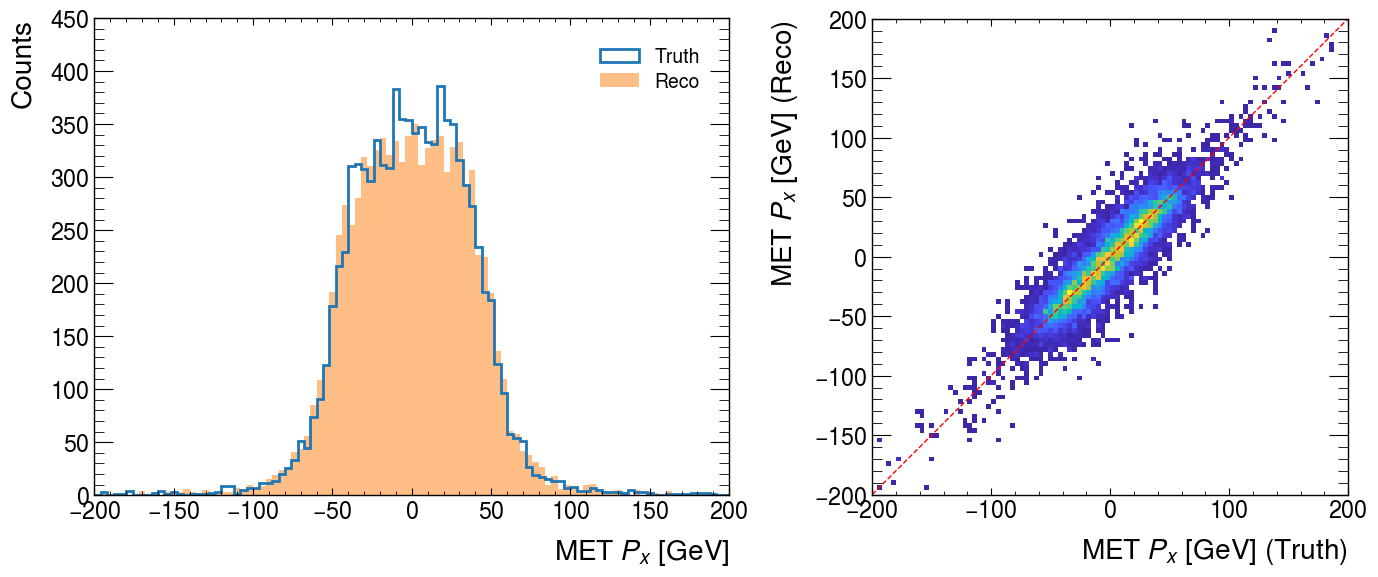

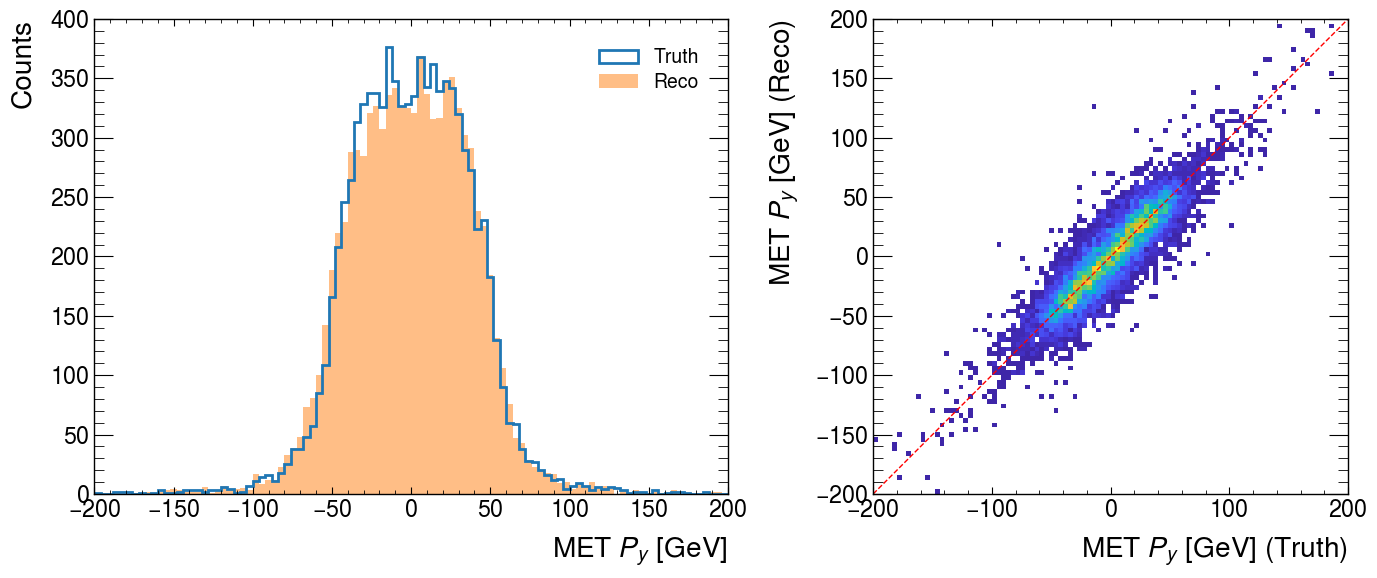

In [47]:
plt_range = [
    [-200,200],
    [-200,200],
]
plt_bins=100
xlabel = [
    r'MET $P_x$ [GeV]',
    r'MET $P_y$ [GeV]',
]
plt_names = [
    'reco_MET_Px',
    'reco_MET_Py',
]
for i in range(2):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
    ax[0].hist(truthMET[:,i+2],range=plt_range[i],bins=plt_bins,histtype='step',lw=2,label='Truth')
    ax[0].hist(recoMET[:,i+1],range=plt_range[i],bins=plt_bins,histtype='bar',alpha=0.5,label='Reco')
    ax[1].hist2d(truthMET[:,i+2],recoMET[:,i+1],range=[plt_range[i],plt_range[i]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
    ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1)
    ax[1].set_box_aspect(1)
    ax[0].set_ylabel("Counts")   
    ax[0].set_xlabel(xlabel[i])
    ax[1].set_ylabel(xlabel[i]+' (Reco)')
    ax[1].set_xlabel(xlabel[i]+' (Truth)')
    ax[0].legend()
    #plt.savefig(filepath+"plots/"+plt_names[i]+'.pdf')
    plt.show()

In [176]:
len(truthMET)

8965

In [111]:
Higgs22 = Higgs22[noTau_DF,:]
Higgs62 = Higgs62[noTau_DF,:]
WmBoson = WmBoson[noTau_DF,:]
WpBoson = WpBoson[noTau_DF,:]
mLepton = mLepton[noTau_DF,:]      
pLepton = pLepton[noTau_DF,:]
mNeutrino = mNeutrino[noTau_DF,:]
pNeutrino = pNeutrino[noTau_DF,:]  
truthMET  = truthMET[noTau_DF,:]  

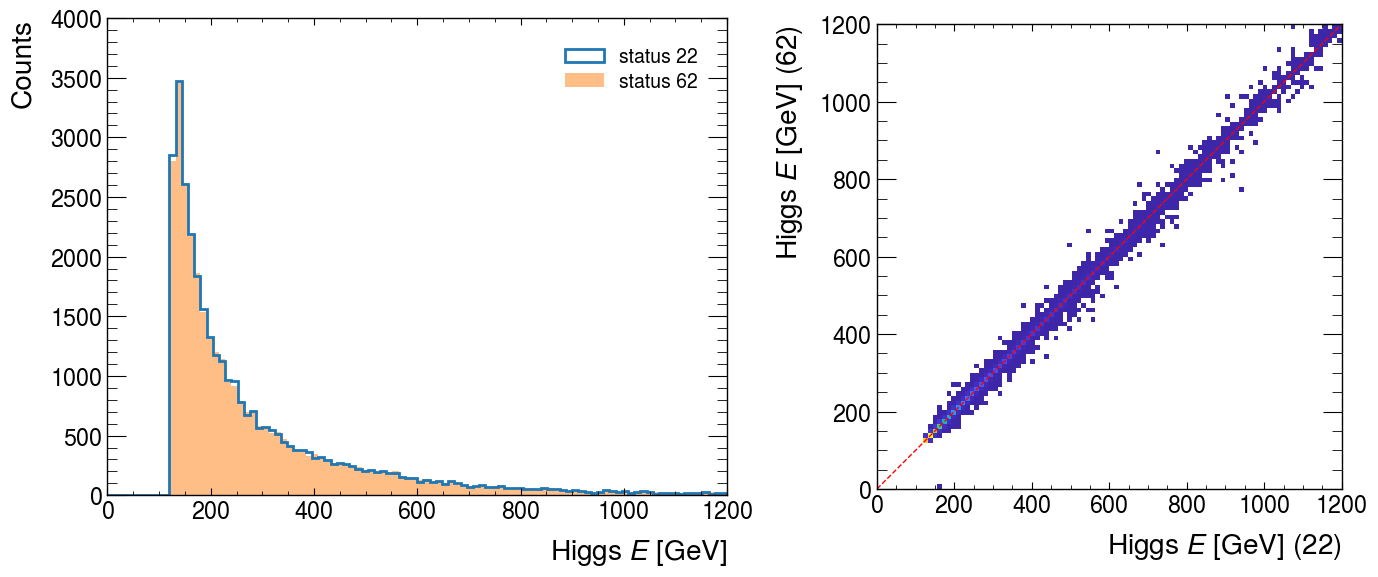

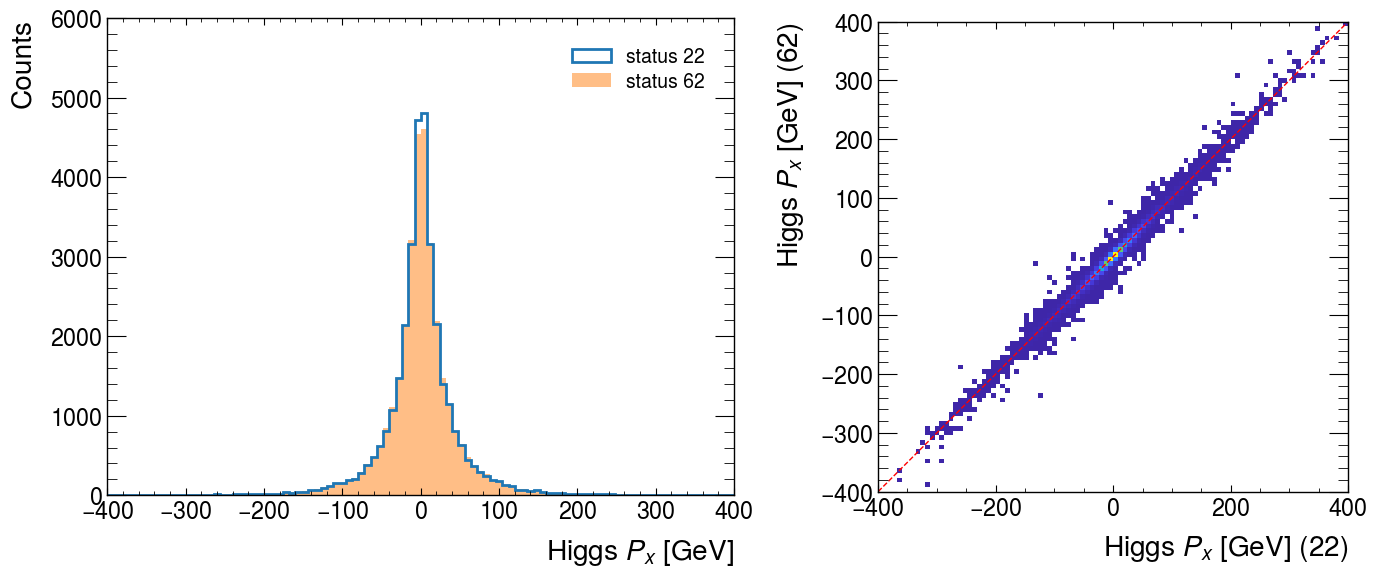

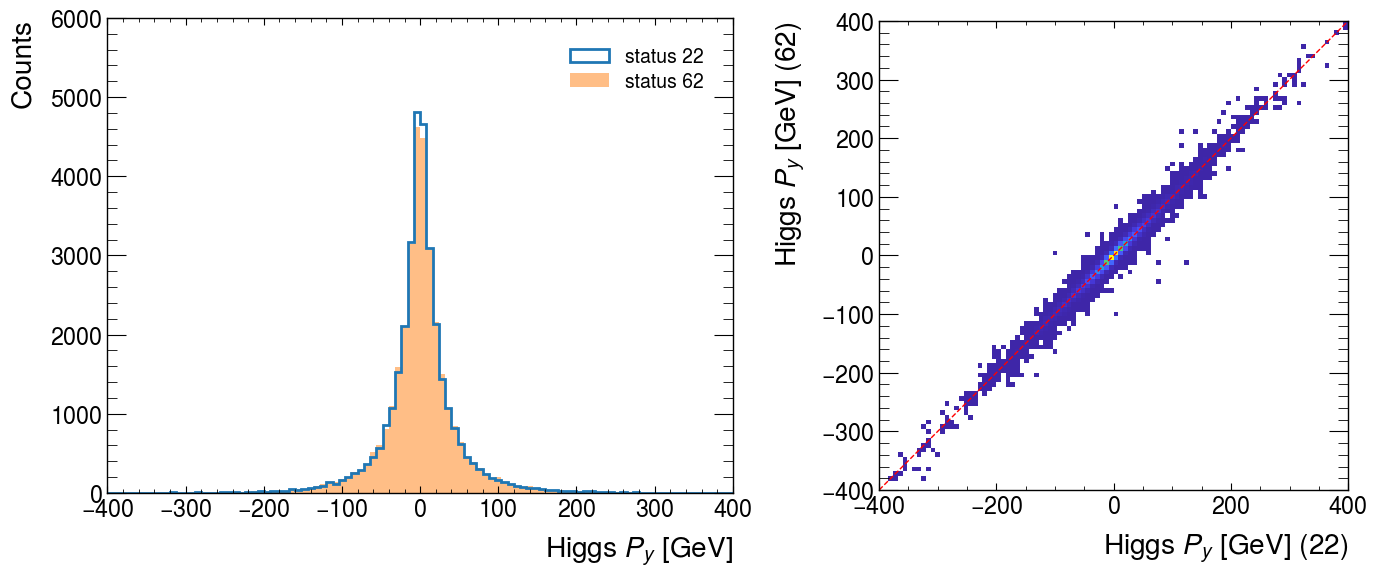

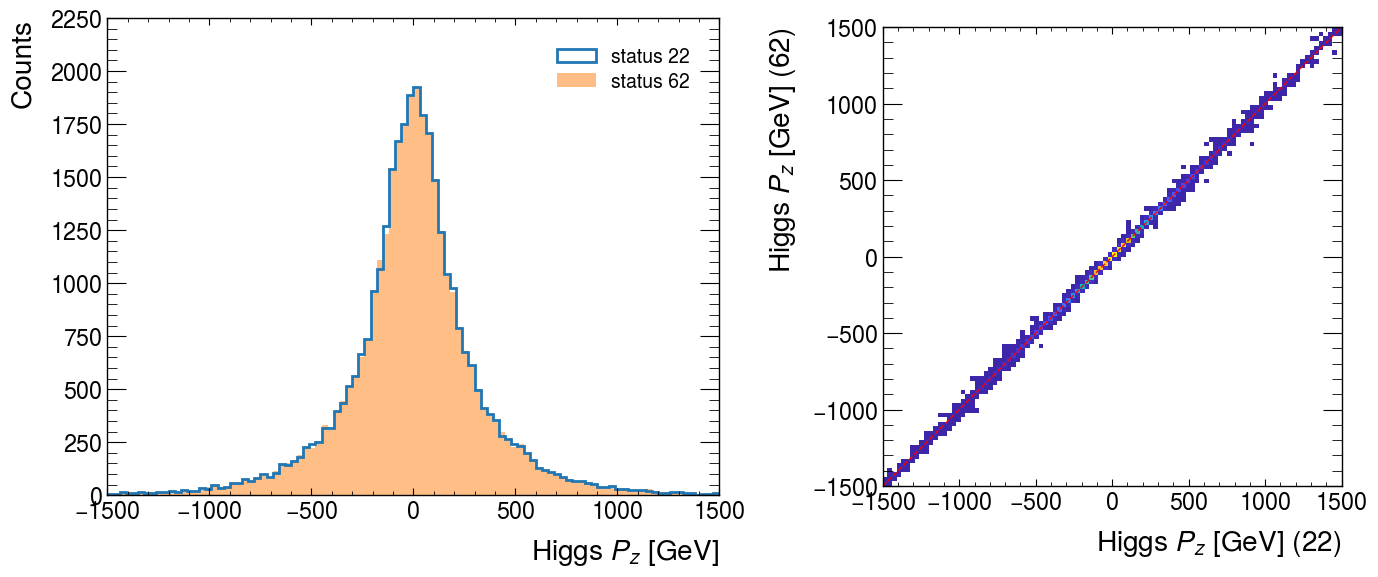

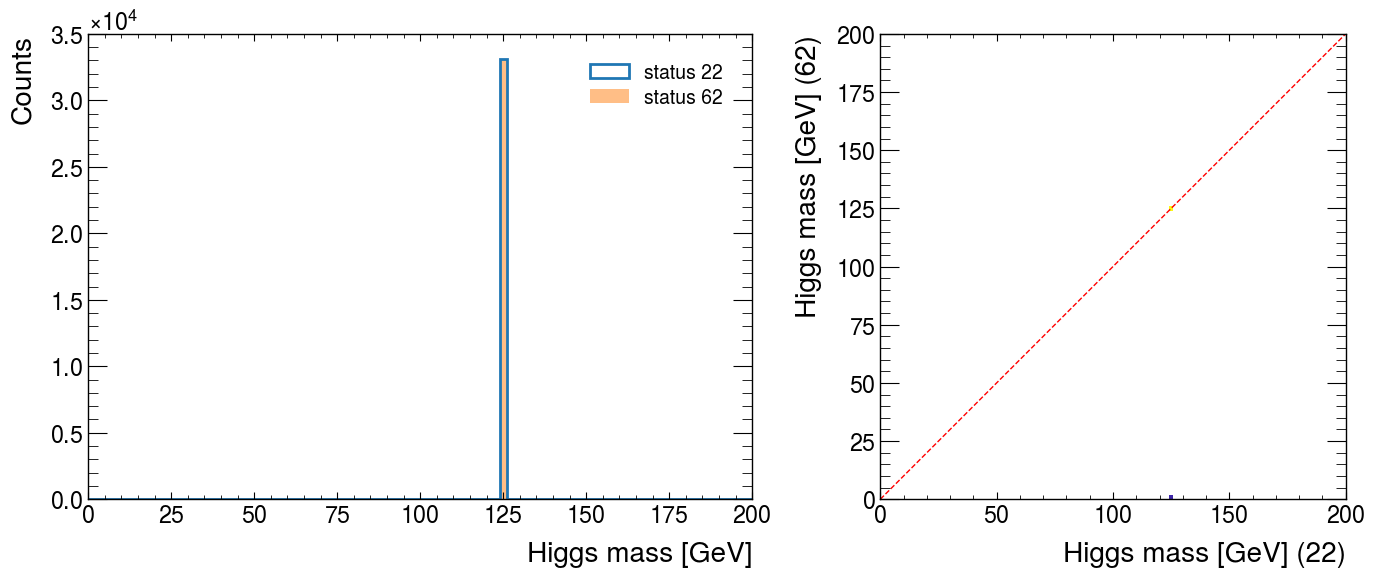

In [119]:
plt_range = [
    [0,1200],
    [-400,400],
    [-400,400],
    [-1500,1500],
    [0,200]
]
plt_bins=100
xlabel = [
    r'Higgs $E$ [GeV]',
    r'Higgs $P_x$ [GeV]',
    r'Higgs $P_y$ [GeV]',
    r'Higgs $P_z$ [GeV]',
    r'Higgs mass [GeV]',
]
plt_names = [
    'truth_Higgs_E',
    'truth_Higgs_Px',
    'truth_Higgs_Py',
    'truth_Higgs_Pz',
    'truth_Higgs_mass',
]
for i in range(5):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
    ax[0].hist(Higgs22[:,i],range=plt_range[i],bins=plt_bins,histtype='step',lw=2,label='status 22')
    ax[0].hist(Higgs62[:,i],range=plt_range[i],bins=plt_bins,histtype='bar',alpha=0.5,label='status 62')
    ax[1].hist2d(Higgs22[:,i],Higgs62[:,i],range=[plt_range[i],plt_range[i]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
    ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1)
    ax[1].set_box_aspect(1)
    ax[0].set_ylabel("Counts")   
    ax[0].set_xlabel(xlabel[i])
    ax[1].set_ylabel(xlabel[i]+' (62)')
    ax[1].set_xlabel(xlabel[i]+' (22)')
    ax[0].legend()
    plt.savefig(filepath+"plots/"+plt_names[i]+'.pdf')
    plt.show()
    

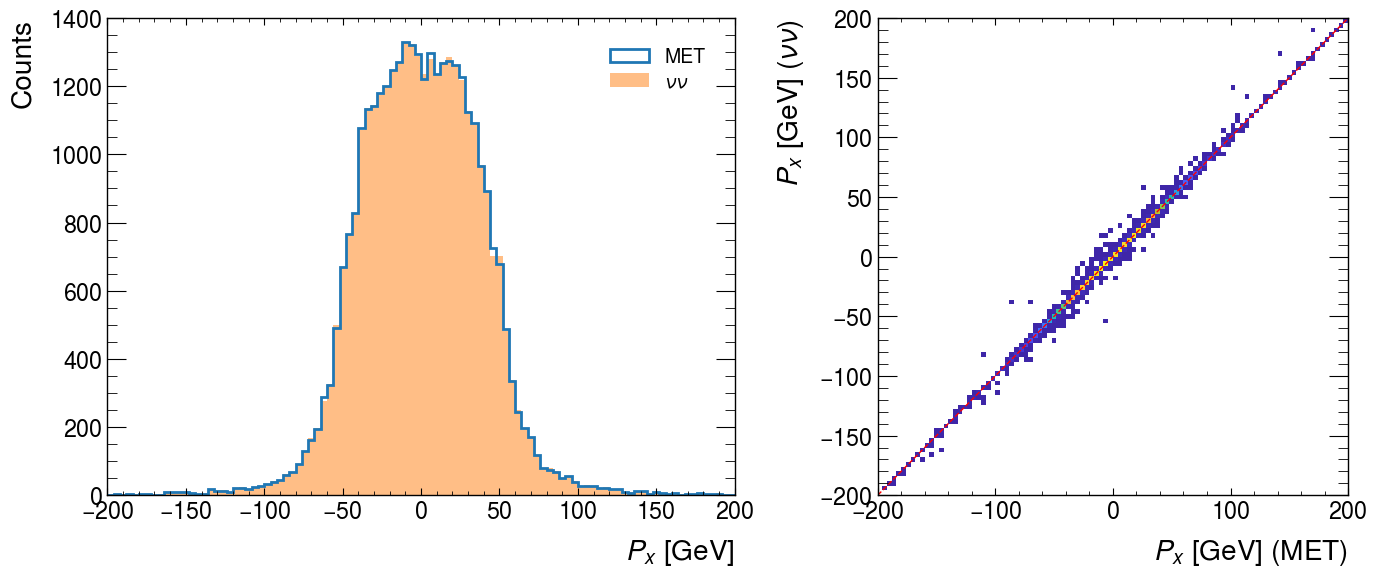

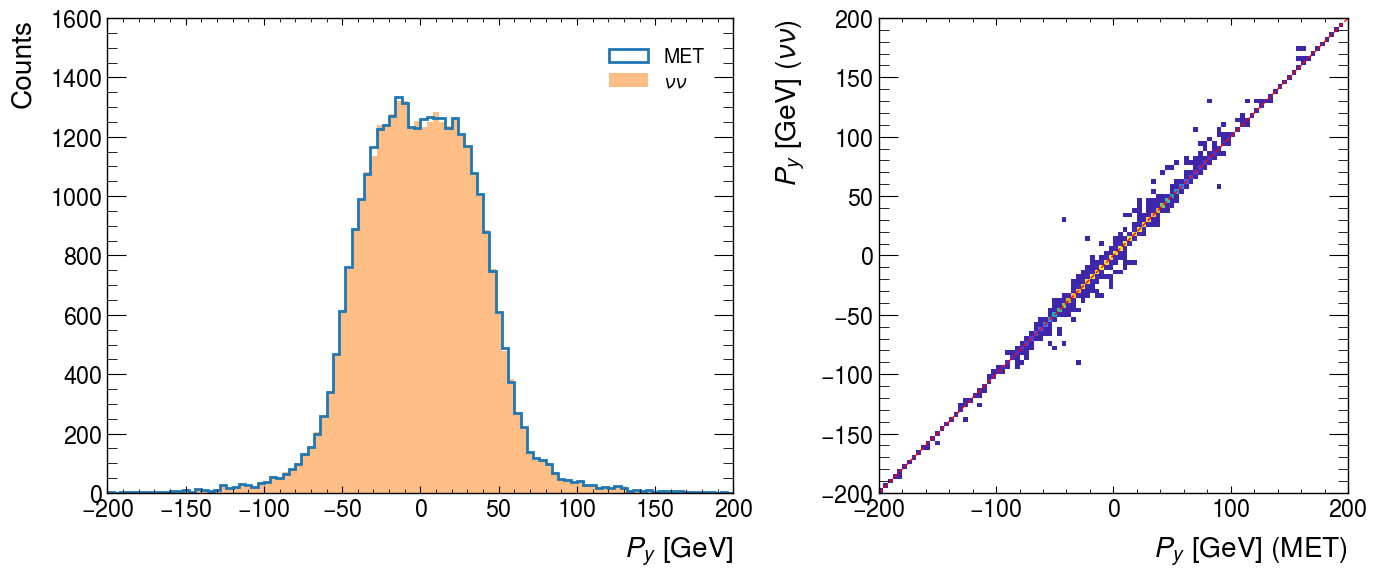

In [114]:
plt_range = [
    [-200,200],
    [-200,200],
]
plt_bins=100
xlabel = [
    r'$P_x$ [GeV]',
    r'$P_y$ [GeV]',
]
plt_names = [
    'truth_MET_Px',
    'truth_MET_Py'
]
for i in range(2):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
    ax[0].hist(truthMET[:,i+2],range=plt_range[i],bins=plt_bins,histtype='step',lw=2,label='MET')
    ax[0].hist(diNeutrino[:,i+1],range=plt_range[i],bins=plt_bins,histtype='bar',alpha=0.5,label=r'$\nu\nu$')
    ax[1].hist2d(truthMET[:,i+2],diNeutrino[:,i+1],range=[plt_range[i],plt_range[i]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
    ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1)
    ax[0].set_ylabel("Counts")   
    ax[0].set_xlabel(xlabel[i])
    ax[1].set_ylabel(xlabel[i]+r' ($\nu\nu$)')
    ax[1].set_xlabel(xlabel[i]+r" (MET)")
    ax[0].legend()
    plt.savefig(filepath+"plots/"+plt_names[i]+'.pdf')
    plt.show()

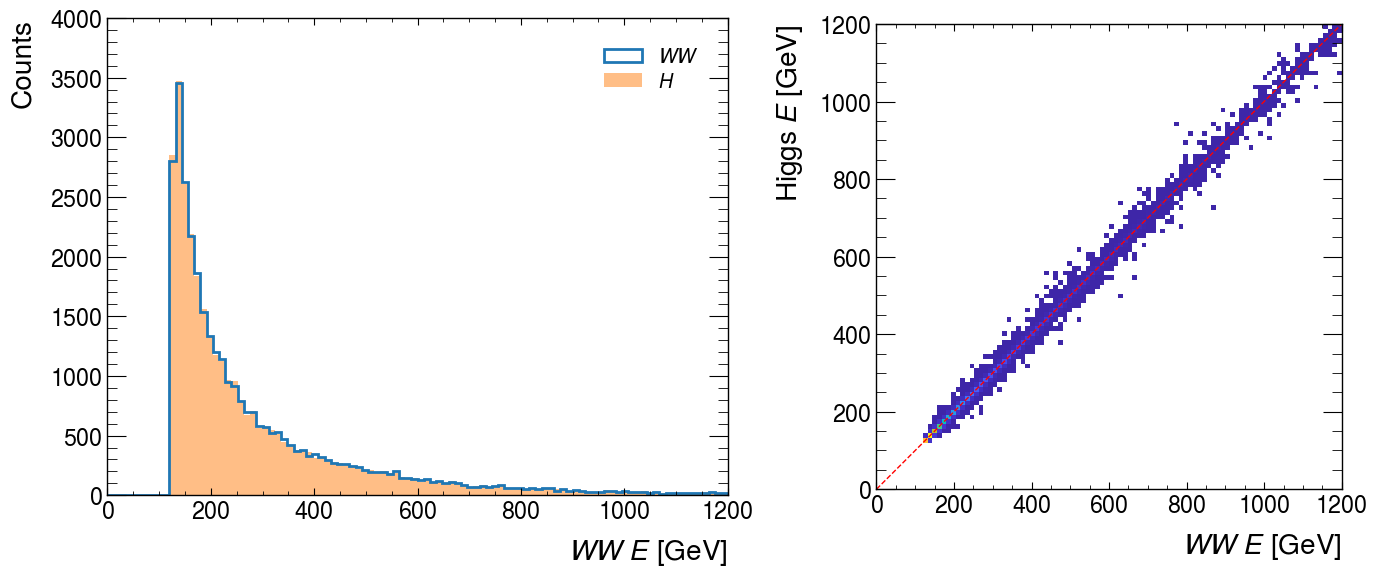

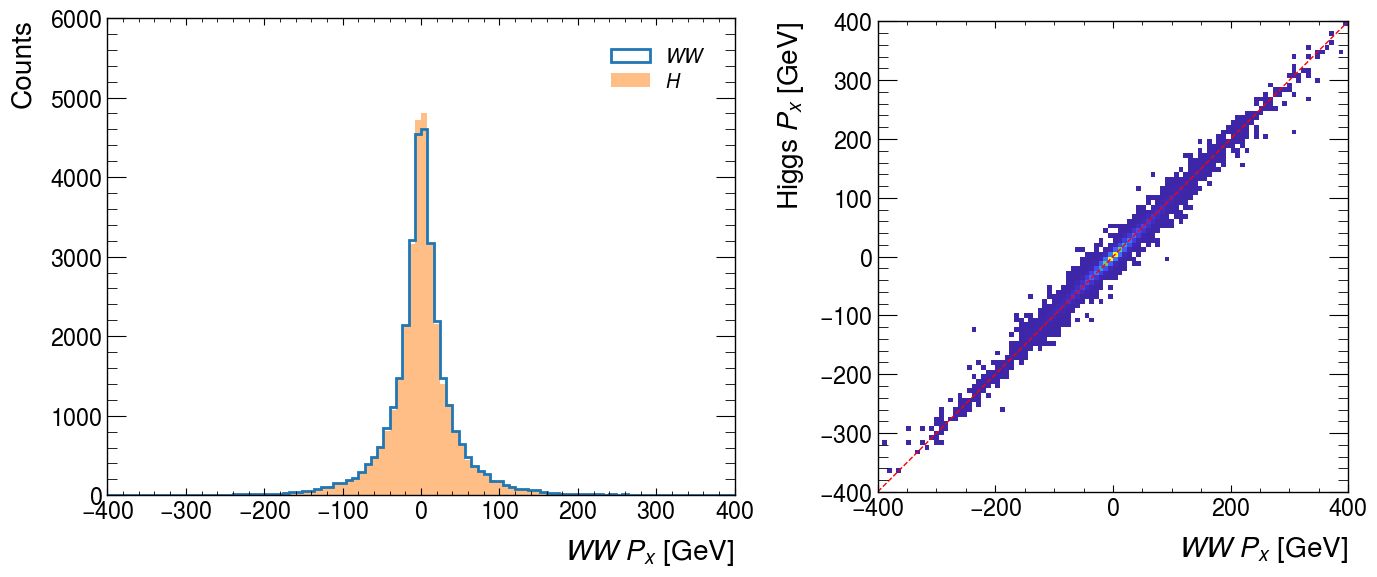

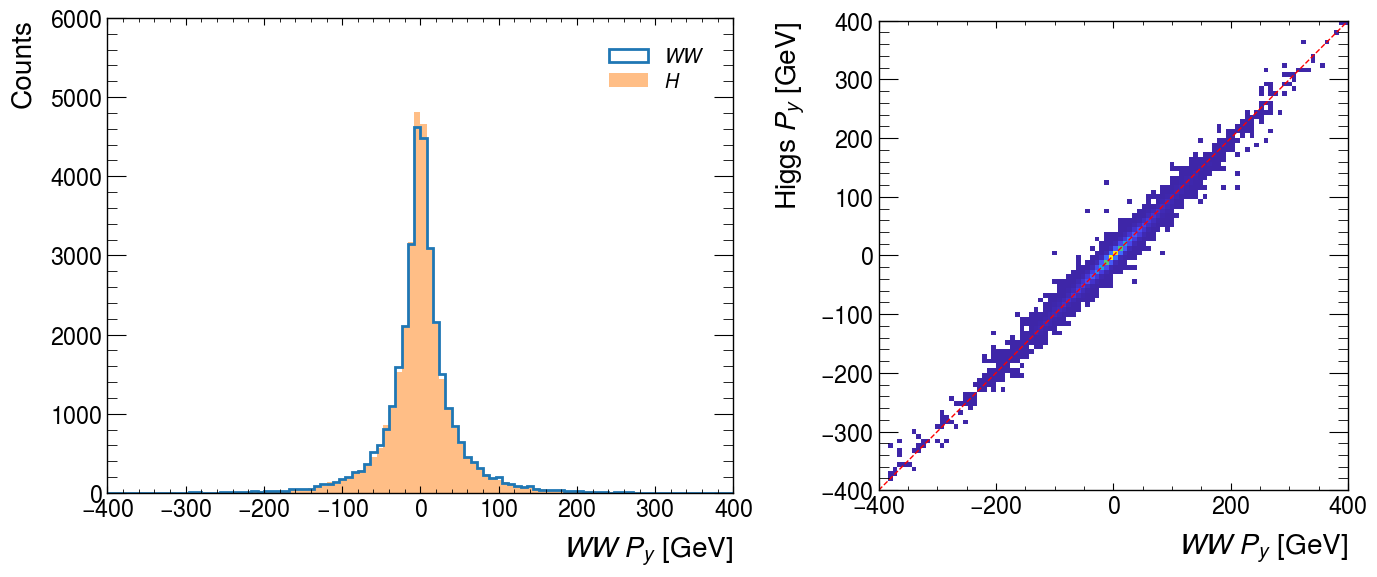

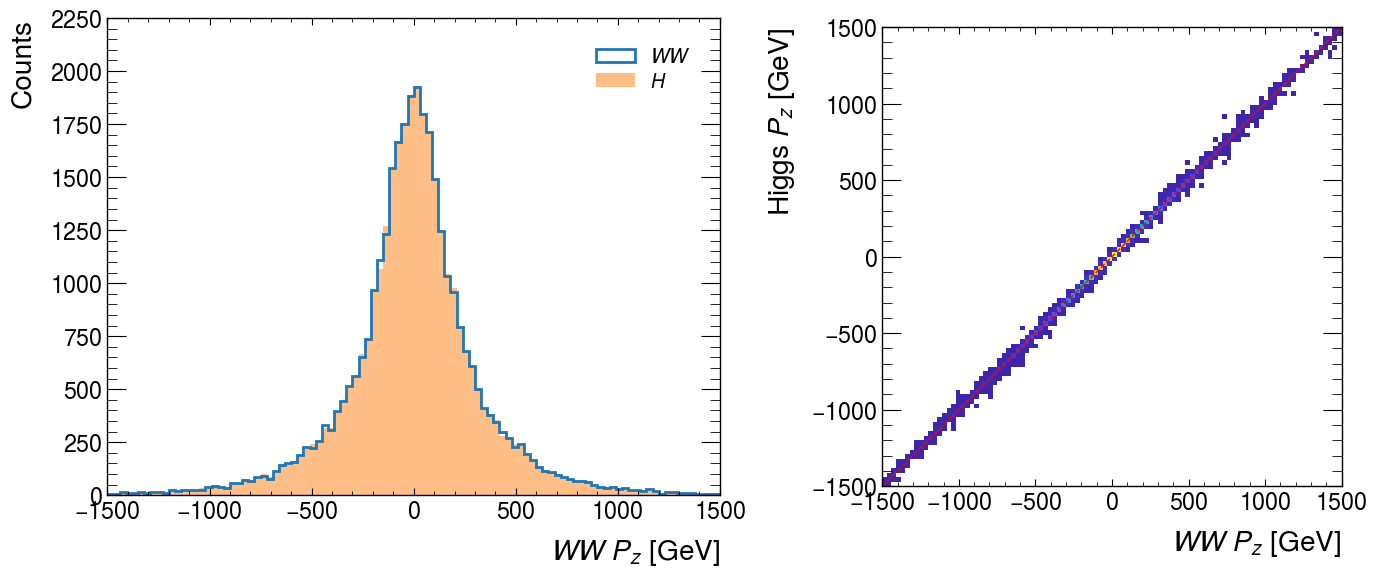

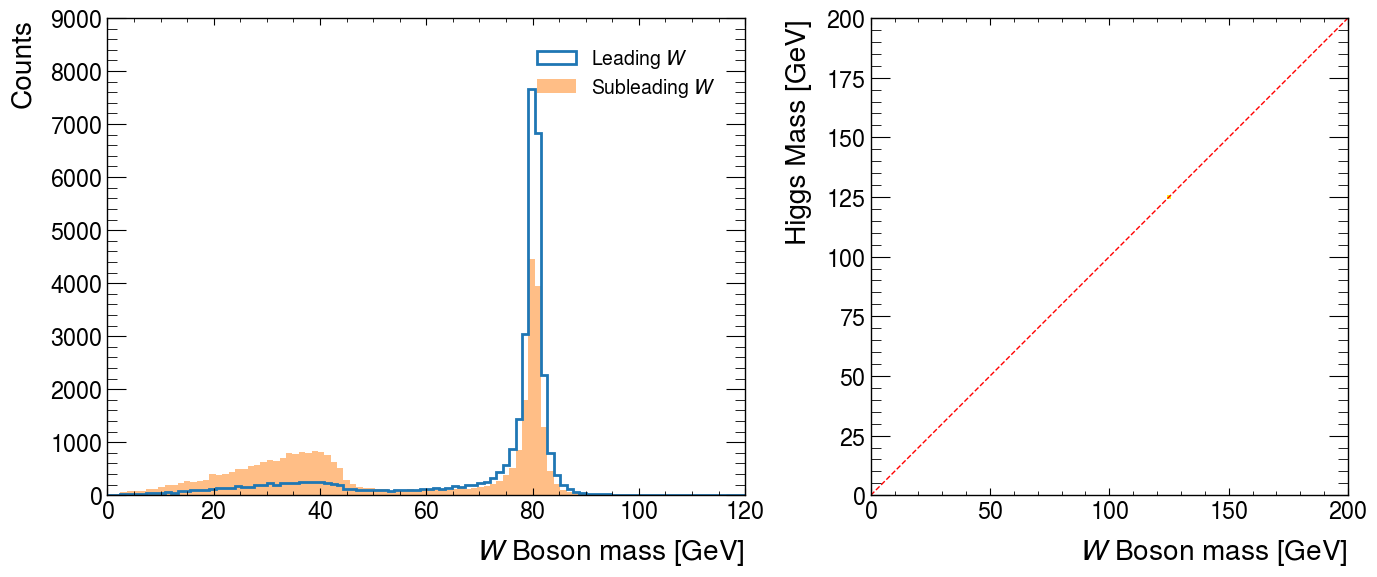

In [128]:
plt_range = [
    [0,1200],
    [-400,400],
    [-400,400],
    [-1500,1500],
    [0,200]
]
plt_bins=100
xlabel = [
    r'$WW$ $E$ [GeV]',
    r'$WW$ $P_x$ [GeV]',
    r'$WW$ $P_y$ [GeV]',
    r'$WW$ $P_z$ [GeV]',
    r'$W$ Boson mass [GeV]',
]
plt_names = [
    'truth_WW_E',
    'truth_WW_Px',
    'truth_WW_Py',
    'truth_WW_Pz',
    'truth_W_mass',
]
p4 = [r'$E$',r'$P_x$',r'$P_y$',r'$P_z$','Mass']
for i in range(5):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
    if i != 4:
        ax[0].hist(diBoson[:,i],range=plt_range[i],bins=plt_bins,histtype='step',lw=2,label='$WW$')
        ax[0].hist(Higgs22[:,i],range=plt_range[i],bins=plt_bins,histtype='bar',alpha=0.5,label='$H$')
        ax[1].hist2d(diBoson[:,i],Higgs22[:,i],range=[plt_range[i],plt_range[i]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
    if i == 4:
        ax[0].hist(LeadingW[:,i],range=[0,120],bins=plt_bins,histtype='step',lw=2,label=r'Leading $W$')
        ax[0].hist(SubleadW[:,i],range=[0,120],bins=plt_bins,histtype='bar',alpha=0.5,label='Subleading $W$')
        ax[1].hist2d(diBoson_mass,Higgs22[:,i],range=[plt_range[i],plt_range[i]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
    ax[1].set_xlabel(xlabel[i])
    ax[1].set_ylabel('Higgs '+p4[i]+' [GeV]')
    ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1)
    ax[1].set_box_aspect(1)
    ax[0].set_ylabel("Counts")   
    ax[0].set_xlabel(xlabel[i])
    ax[0].legend(loc='best')
    plt.savefig(filepath+"plots/"+plt_names[i]+'.pdf')
    plt.show()

In [120]:
lvp_mass = mv.inv_mass(pLepton[:,0]+pNeutrino[:,0],
                       pLepton[:,1]+pNeutrino[:,1],
                       pLepton[:,2]+pNeutrino[:,2],
                       pLepton[:,3]+pNeutrino[:,3])

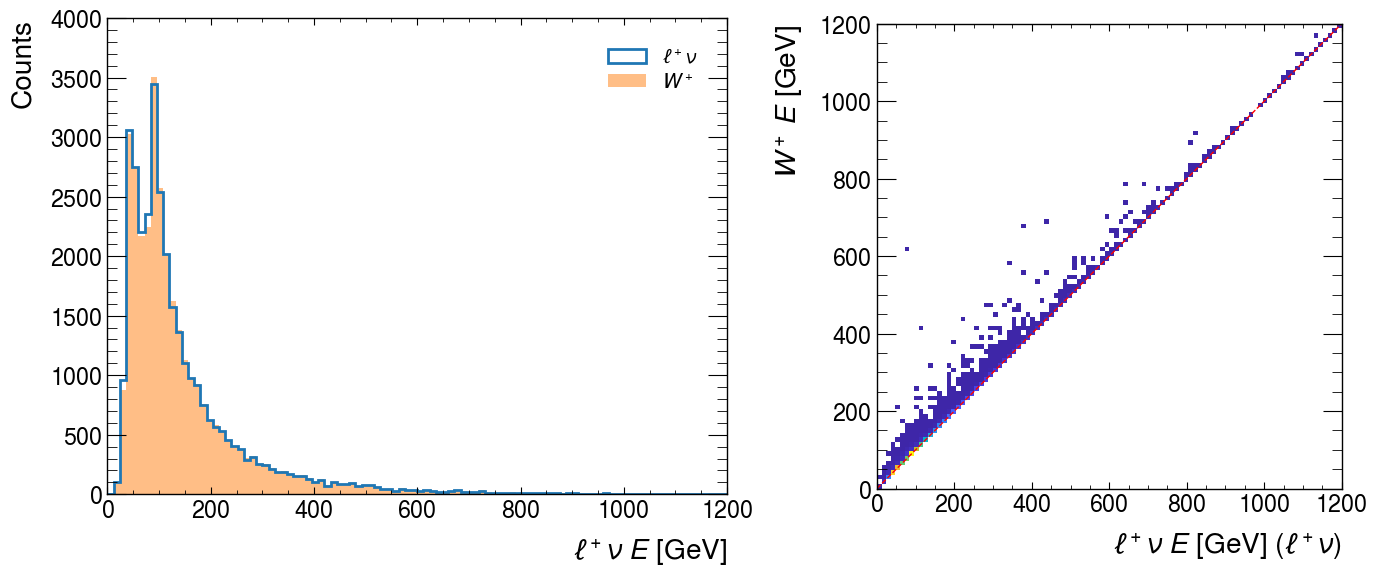

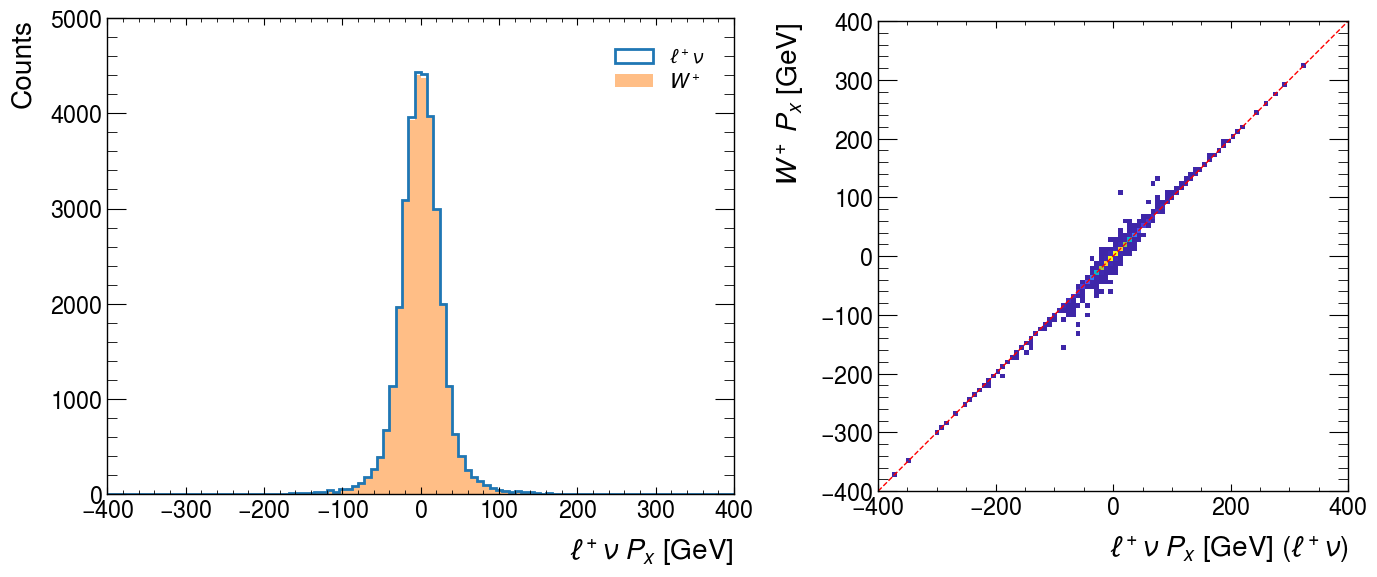

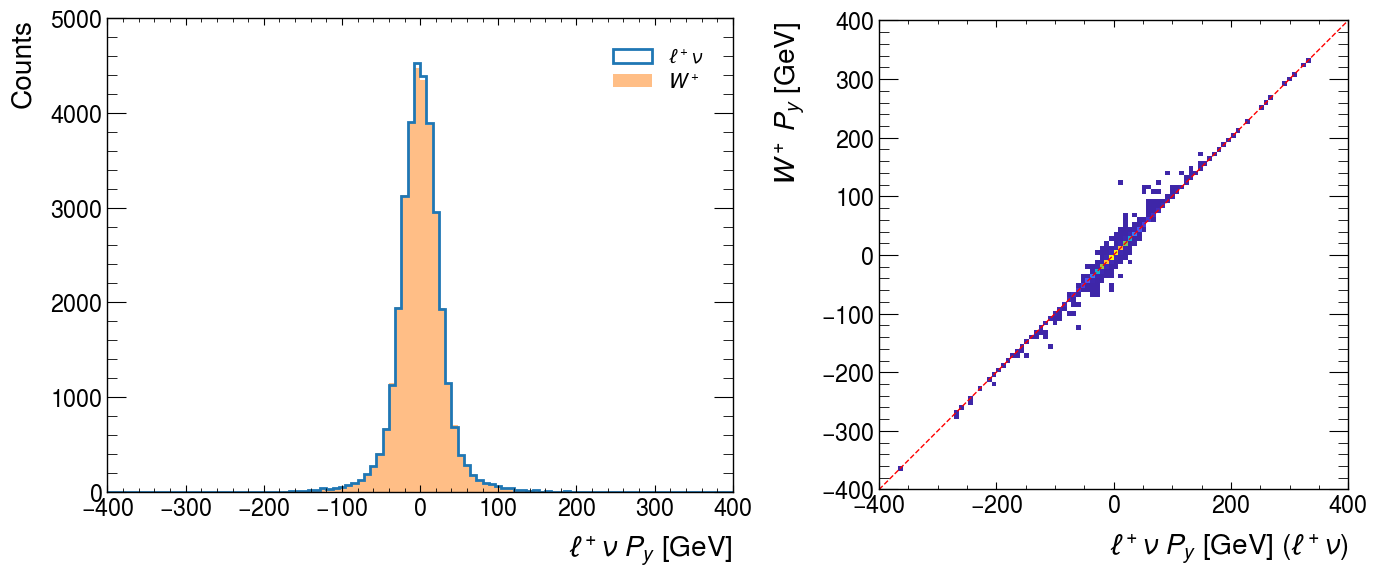

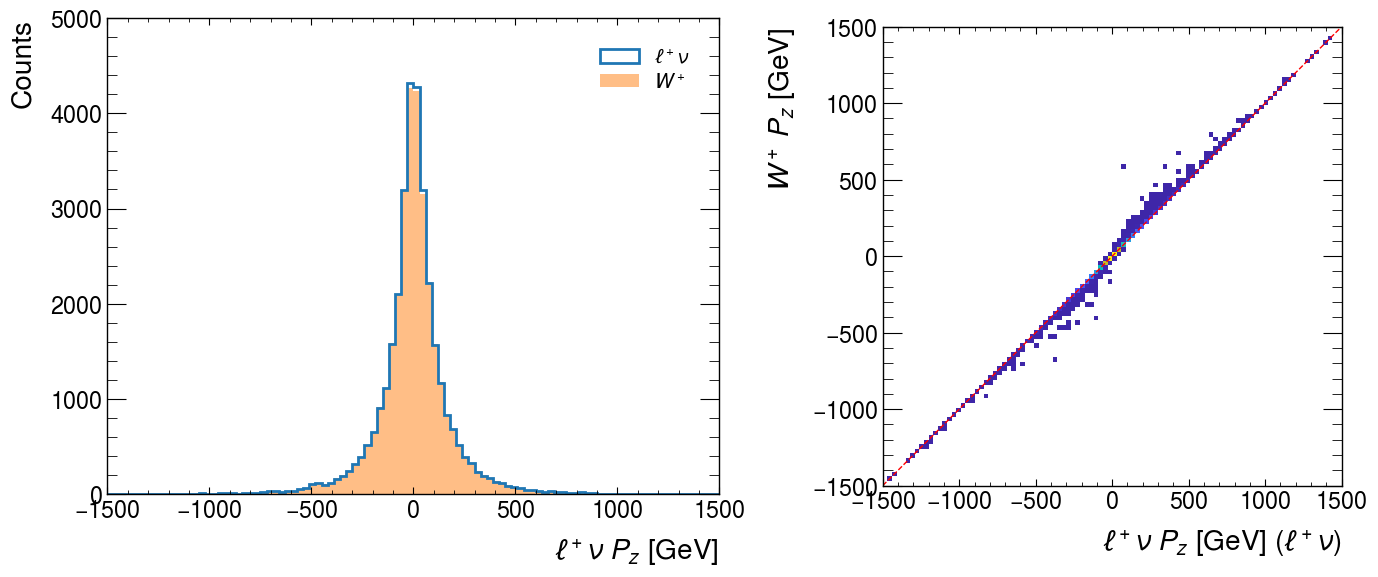

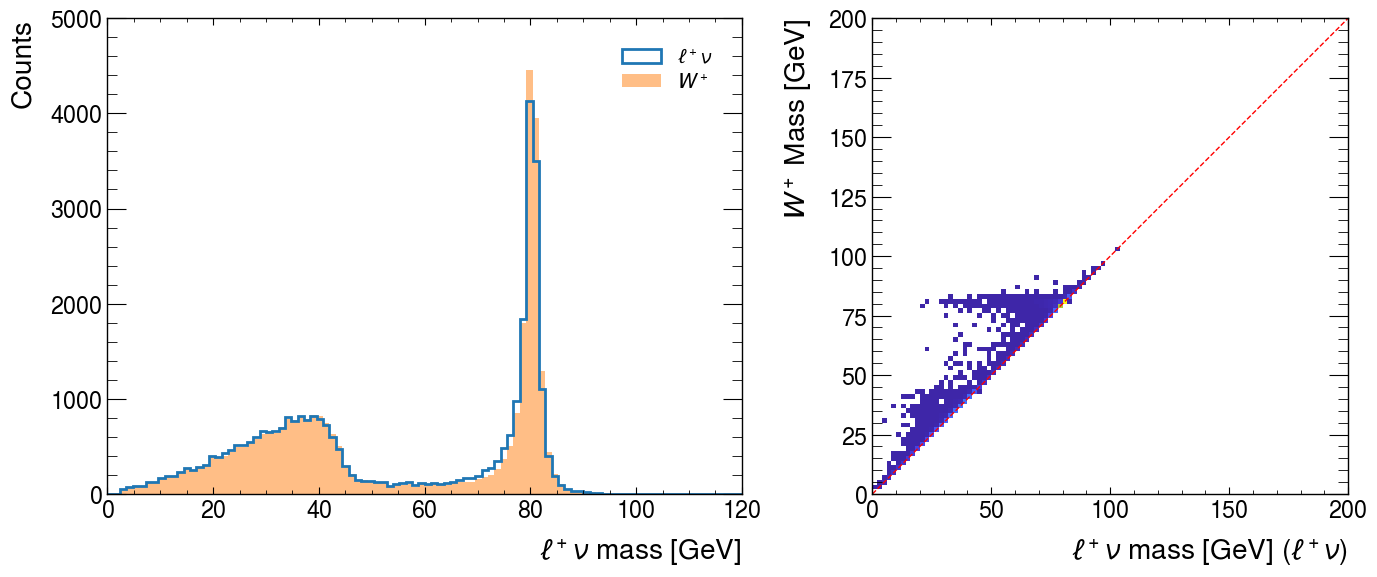

In [132]:

plt_range = [
    [0,1200],
    [-400,400],
    [-400,400],
    [-1500,1500],
    [0,200]
]
plt_bins=100
xlabel = [
    r'$\ell^+\nu$ $E$ [GeV]',
    r'$\ell^+\nu$ $P_x$ [GeV]',
    r'$\ell^+\nu$ $P_y$ [GeV]',
    r'$\ell^+\nu$ $P_z$ [GeV]',
    r'$\ell^+\nu$ mass [GeV]',
]
plt_names = [
    'truth_lvp_E',
    'truth_lvp_Px',
    'truth_lvp_Py',
    'truth_lvp_Pz',
    'truth_lvp_mass',
]
for i in range(5):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
    if i != 4:
        ax[0].hist(pLepton[:,i]+pNeutrino[:,i],range=plt_range[i],bins=plt_bins,histtype='step',lw=2,label=r'$\ell^+\nu$')
        ax[0].hist(WpBoson[:,i],range=plt_range[i],bins=plt_bins,histtype='bar',alpha=0.5,label=r'$W^+$')
        ax[1].hist2d(pLepton[:,i]+pNeutrino[:,i],WpBoson[:,i],range=[plt_range[i],plt_range[i]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
    if i == 4:
        ax[0].hist(lvp_mass,range=[0,120],bins=plt_bins,histtype='step',lw=2,label=r'$\ell^+\nu$')
        ax[0].hist(WpBoson[:,i],range=[0,120],bins=plt_bins,histtype='bar',alpha=0.5,label=r'$W^+$')
        ax[1].hist2d(lvp_mass,WpBoson[:,i],range=[plt_range[i],plt_range[i]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
    ax[1].set_xlabel(xlabel[i]+r' ($\ell^+\nu$)')
    ax[1].set_ylabel(r'$W^+$ '+p4[i]+' [GeV]')
    ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1)
    ax[1].set_box_aspect(1)
    ax[0].set_ylabel("Counts")   
    ax[0].set_xlabel(xlabel[i])
    ax[0].legend(loc='best')
    plt.savefig(filepath+"plots/"+plt_names[i]+'.pdf')
    plt.show()

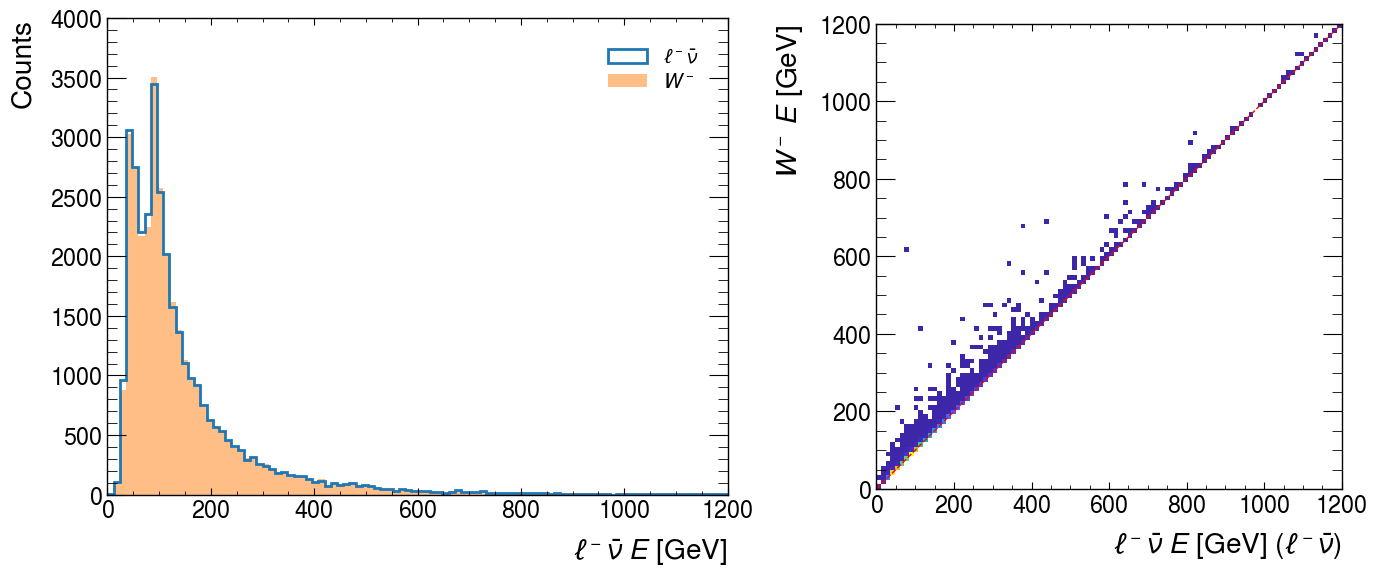

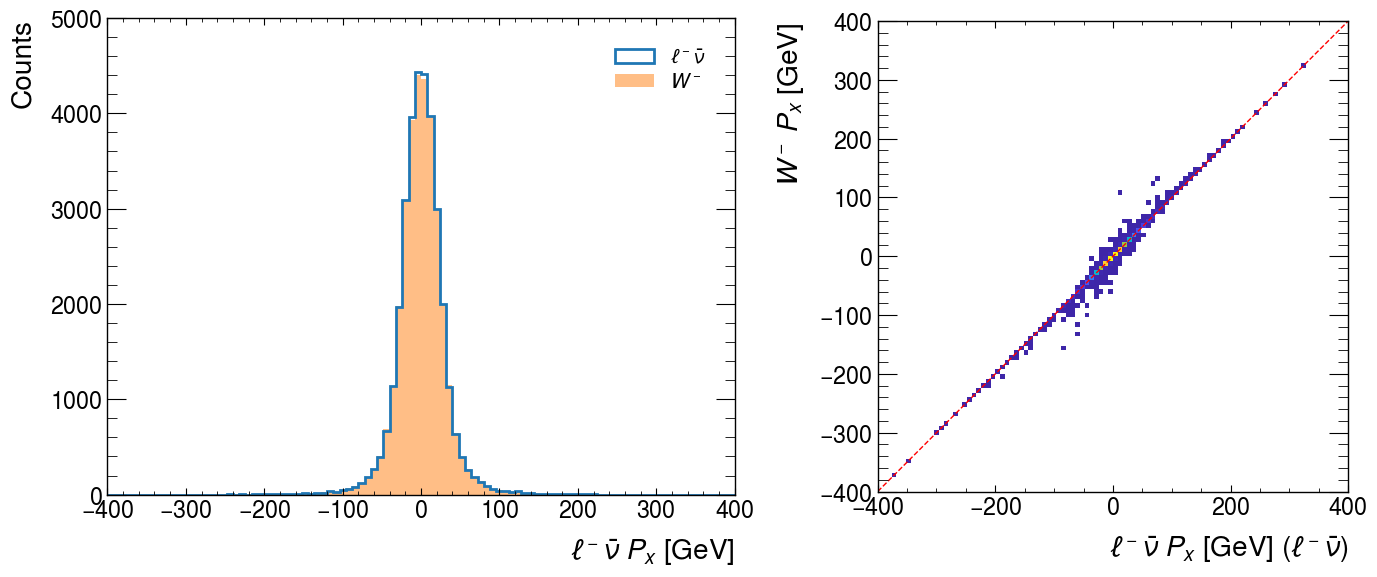

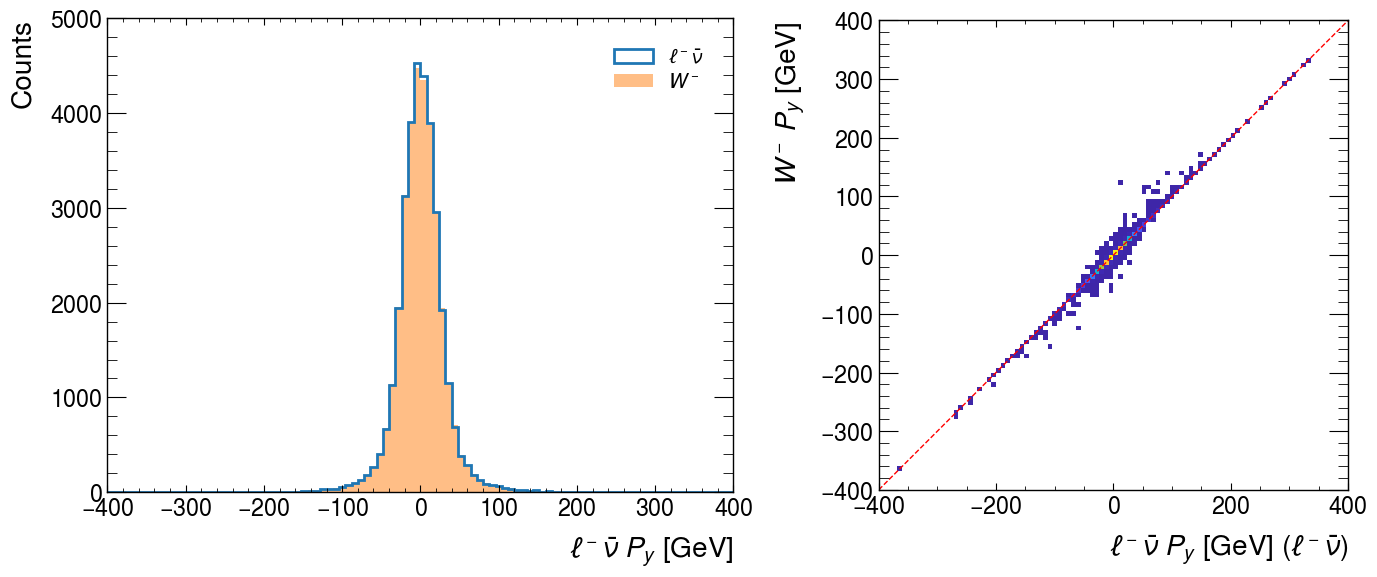

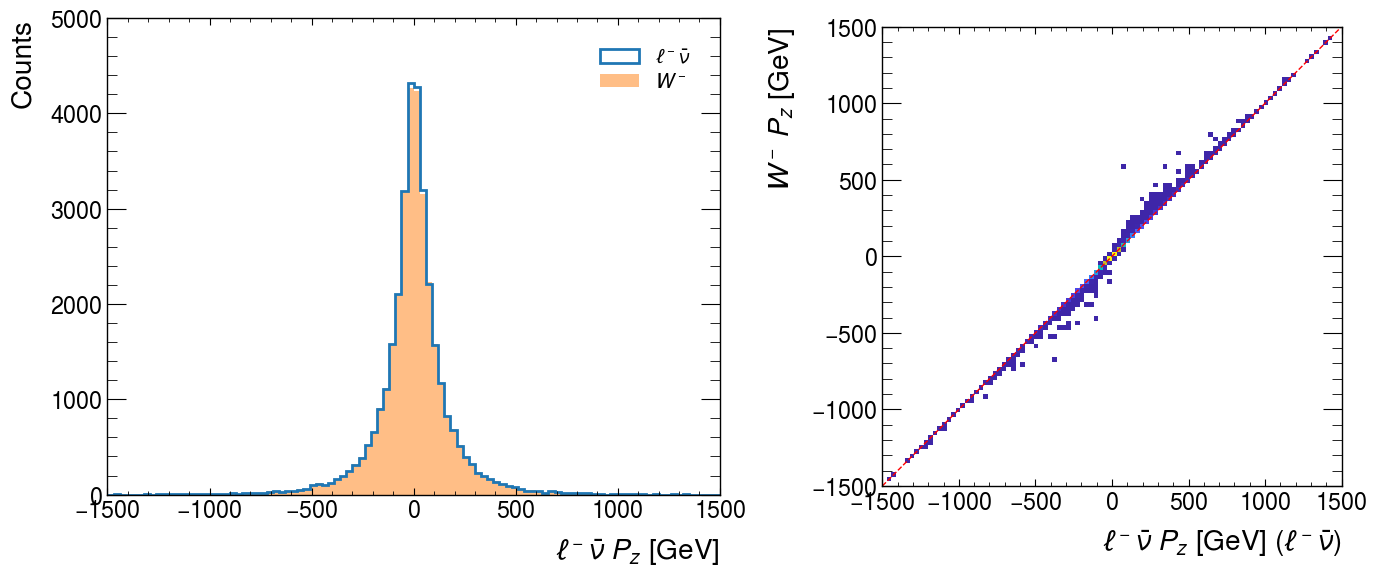

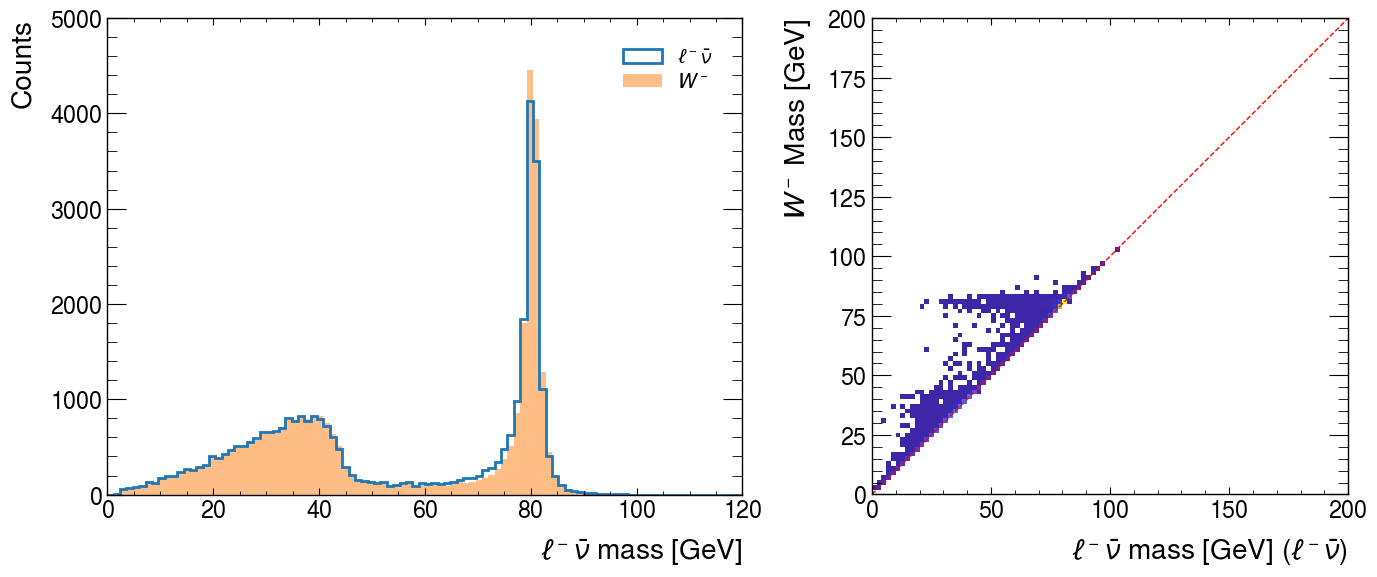

In [133]:

plt_range = [
    [0,1200],
    [-400,400],
    [-400,400],
    [-1500,1500],
    [0,200]
]
plt_bins=100
xlabel = [
    r'$\ell^-\bar{\nu}$ $E$ [GeV]',
    r'$\ell^-\bar{\nu}$ $P_x$ [GeV]',
    r'$\ell^-\bar{\nu}$ $P_y$ [GeV]',
    r'$\ell^-\bar{\nu}$ $P_z$ [GeV]',
    r'$\ell^-\bar{\nu}$ mass [GeV]',
]
plt_names = [
    'truth_lvm_E',
    'truth_lvm_Px',
    'truth_lvm_Py',
    'truth_lvm_Pz',
    'truth_lvm_mass',
]
for i in range(5):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
    if i != 4:
        ax[0].hist(pLepton[:,i]+pNeutrino[:,i],range=plt_range[i],bins=plt_bins,histtype='step',lw=2,label=r'$\ell^-\bar{\nu}$')
        ax[0].hist(WpBoson[:,i],range=plt_range[i],bins=plt_bins,histtype='bar',alpha=0.5,label=r'$W^-$')
        ax[1].hist2d(pLepton[:,i]+pNeutrino[:,i],WpBoson[:,i],range=[plt_range[i],plt_range[i]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
    if i == 4:
        ax[0].hist(lvp_mass,range=[0,120],bins=plt_bins,histtype='step',lw=2,label=r'$\ell^-\bar{\nu}$')
        ax[0].hist(WpBoson[:,i],range=[0,120],bins=plt_bins,histtype='bar',alpha=0.5,label=r'$W^-$')
        ax[1].hist2d(lvp_mass,WpBoson[:,i],range=[plt_range[i],plt_range[i]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
    ax[1].set_xlabel(xlabel[i]+r' ($\ell^-\bar{\nu}$)')
    ax[1].set_ylabel(r'$W^-$ '+p4[i]+' [GeV]')
    ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1)
    ax[1].set_box_aspect(1)
    ax[0].set_ylabel("Counts")   
    ax[0].set_xlabel(xlabel[i])
    ax[0].legend(loc='best')
    plt.savefig(filepath+"plots/"+plt_names[i]+'.pdf')
    plt.show()

/opt/conda/envs/aikit-tf/lib/python3.9/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/envs/aikit-tf/lib/python3.9/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


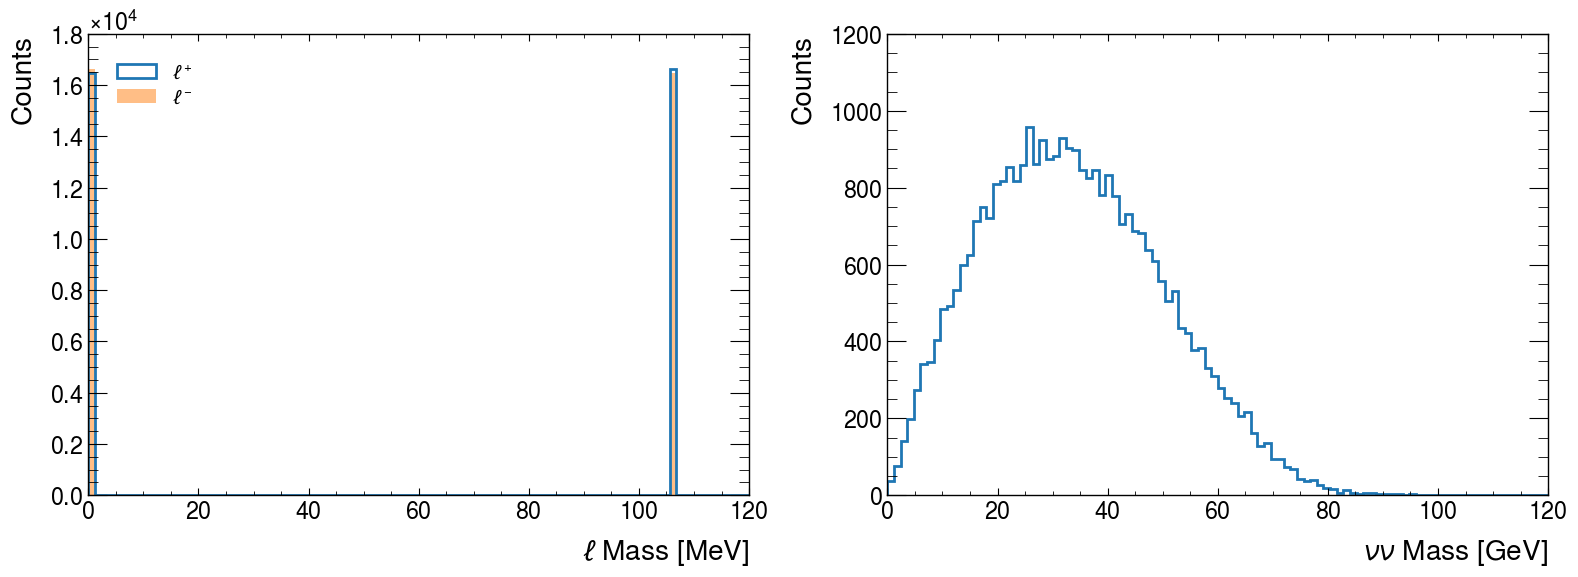

In [153]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,6),gridspec_kw={'width_ratios':[6,6]},tight_layout=True)
MeV = 1000
ax[0].hist(pLepton[:,4]*MeV,range=[0,120],bins=plt_bins,histtype='step',lw=2,label=r'$\ell^+$')
ax[0].hist(mLepton[:,4]*MeV,range=[0,120],bins=plt_bins,histtype='bar',alpha=0.5,label=r'$\ell^-$')
ax[1].hist(diNeutrino_mass ,range=[0,120],bins=plt_bins,histtype='step',lw=2)
ax[0].legend()
ax[0].set_ylabel("Counts")
ax[1].set_ylabel("Counts")
ax[0].set_xlabel(r"$\ell$ Mass [MeV]")
ax[1].set_xlabel(r"$\nu\nu$ Mass [GeV]")
plt.savefig(filepath+"plots/"+"truth_l_vv_mass"+'.pdf')
plt.show()

In [152]:
np.unique(np.where(diNeutrino[:,0]**2 < mv.vec_mag_2(diNeutrino[:,1],diNeutrino[:,2],diNeutrino[:,3]),0,1),return_counts=True)
#np.unique(np.where(pLepton[:,0]**2 < mv.vec_mag_2(pLepton[:,1],pLepton[:,2],pLepton[:,3]),0,1),return_counts=True)

(array([0, 1]), array([    1, 33127]))